# Table of Contents<a name="top"></a>
**Problem Statement**: What is your Ames, Iowa home worth? And how you can increase that value! 
- [Import Libraries and Read Data](#import)
- [Data Dictionary](#dictionary)
- [Price Distribution Graphs](#price_dist)
- [Model Prediction Graph](#model)
- [Quality Graphs](#model)

# TO DO
- README.md
- presentation slides


<a name="import"></a>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import scipy.stats as stats
from sklearn.datasets import load_iris 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
h_df = pd.read_csv('./datasets/train_final.csv').drop(
    'Unnamed: 0', axis=1)

In [3]:
original_df = pd.read_csv('./datasets/train.csv')

In [4]:
original_df.columns=original_df.columns.str.lower().str.replace(' ', '_')

In [5]:
h_df.columns

Index(['overall_qual', 'year_built', 'roof_style', 'roof_matl', 'mas_vnr_area',
       'exter_cond', 'bsmt_exposure', 'total_bsmt_sf', 'gr_liv_area',
       'full_bath', 'kitchen_qual', 'garage_area', 'paved_drive', 'saleprice',
       'has_basement', 'attached_garage', 'offsite_feature', 'residential_low',
       'residential_other', 'floating_village', 'hillside', 'banked',
       'culdesac', 'northridge', 'northridge_hts', 'briardale',
       'log_gr_liv_area', 'log_total_bsmt_sf', 'sqrt_gr_liv_area',
       'inter_qual_rl', 'inter_qual_fv', 'inter_area_fv', 'fireplaces',
       'str_gravel', 'commercial', 'regular_lot', 'ir2_lot', 'qual_bsmt_sf',
       'square_overall_qual'],
      dtype='object')

In [6]:
h_df.dtypes

overall_qual             int64
year_built               int64
roof_style             float64
roof_matl              float64
mas_vnr_area           float64
exter_cond               int64
bsmt_exposure          float64
total_bsmt_sf          float64
gr_liv_area              int64
full_bath                int64
kitchen_qual             int64
garage_area            float64
paved_drive              int64
saleprice                int64
has_basement             int64
attached_garage        float64
offsite_feature          int64
residential_low          int64
residential_other        int64
floating_village         int64
hillside                 int64
banked                   int64
culdesac                 int64
northridge               int64
northridge_hts           int64
briardale                int64
log_gr_liv_area        float64
log_total_bsmt_sf      float64
sqrt_gr_liv_area       float64
inter_qual_rl            int64
inter_qual_fv            int64
inter_area_fv          float64
fireplac

In [7]:
original_df.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

## Data Dictionary <a name="dictionary"></a>

[back to top](#top)

|Feature|Type|Dataset|Description|
|---|---|---|---|
|overall_qual|int|h_df|Overall Quality of Home, scale from 10 (Very Excellent) to 1 (Very Poor), unmodified from original dataset| 
|year_built|float64|h_df|Original Construction Year, unmodified from original dataset| 
|roof_style|float64|h_df|Hip = 1, All other roof types = 0, modified from original dataset| 
|roof_matl|float64|h_df|Wood Shake or Wood Shingle = 1, All other roof materials = 0, modified from original dataset| 
|mas_vnr_area|float64|h_df|Masonry Veneer Area in Square Feet, unmodified from original dataset| 
|exter_cond|int64|h_df|Exterior Condition, scale from 5 (Excellent) to 1 (Poor), modified from original dataset| 
|bsmt_exposure|float64|h_df|Good = 1, Less than good exposure or no basement = 0, modified from original dataset| 
|total_bsmt_sf|float64|h_df|Basement Area in Square Feet, unmodified from original dataset| 
|gr_liv_area|float64|h_df|Above Ground Living Area in Square Feet, unmodified from original dataset| 
|full_bath|int64|h_df|Full Bathrooms Above Grade, ummodified from original dataset| 
|kitchen_qual|int64|h_df|Kitchen Quality, scale from 5 (Excellent) to 1 (Poor), modified from original dataset| 
|fireplaces|int64|h_df|Number of fireplaces, unmodified from original dataset|
|garage_area|float64|h_df|Garage Area in Square Feet, unmodified from original dataset| 
|paved_drive|int64|h_df|Fully Paved Driveway = 1, Partially Paved, Unpaved or No Driveway = 0, modified from original dataset| 
|saleprice|int64|h_df|Sale Price of Home, unmodified from original dataset| 
|has_basement|int64|h_df|Has Basement = 1, Does not have = 0, modified from bsmtfintype 1 and 2| 
|attached_garage|float64|h_df|Built In or Attached = 1, All other types or none = 0, modified from garage_type| 
|offsite_feature|int64|h_df|Near of Adjacent to Positive Offsite Feature = 1, Not Near = 0, modified from condition_1| 
|residential_low|int64|h_df|Zoned as Low Density Residential = 1, Otherwise = 0, modified from ms_zoning| 
|residential_other|int64|h_df|Zoned as Residential: Medium Density, High Density or Park = 1, Otherwise = 0, modified from ms_zoning| 
|floating_village|int64|h_df|Zoned as Floating Village = 1, Otherwise = 0, modified from ms_zoning| 
|commercial|float64|h_df|Zoned as Commercial = 1, Otherwise = 0, modified from ms_zoning|
|str_gravel|float64|h_df|Access to property is Gravel = 1, Otherwise = 0, modified from street| 
|regular_lot|int64|h_df|Lot Shape is Regular = 1, Others = 0, modified from lot_shape| 
|ir2_lot|int64|h_df|Lot Shape is Moderately Irregular = 1, Others = 0, modified from lot_shape|  
|culdesac|int64|h_df|Properties in a Cul-de-sac = 1, Otherwise = 0, modified from lot_config| 
|northridge|int64|h_df|Located in Northridge = 1, Otherwise = 0, modified from neighborhood| 
|northridge_hts|int64|h_df|Located in Northridge Heights = 1, Otherwise = 0, modified from neighborhood| 
|briardale|int64|h_df|Located in Briardale = 1, Otherwise = 0, modified from neighborhood| 
|---|---|---|---|
|log_gr_liv_area|float64|h_df|Natural Log of gr_liv_area Variable| 
|log_total_bsmt_sf|float64|h_df|Natural Log of total_bsmt_sf Variable| 
|sqrt_gr_liv_area|float64|h_df|Square Root of gr_liv_area Variable| 
|square_overall_qual|int64|h_df|Square of overall_qual| 
|inter_qual_rl|int64|h_df|Interaction between overall_qual and residential_low| 
|inter_qual_fv|int64|h_df|Interaction between overall_qual and floating_village| 
|inter_area_fv|float64|h_df|Interaction between gr_liv_area and floating_village| 
|qual_bsmt_sf|float64|h_df|Interaction between overall_qual and total_bsmt_sf| 


|Feature|Type|Dataset|Description|
|---|---|---|---|
|overall_qual|int64|h_df|Overall Quality of Home, scale from 10 (Very Excellent) to 1 (Very Poor), unmodified from original dataset| 
|year_built|float64|h_df|Original Construction Year, unmodified from original dataset| 
|exter_cond|int64|h_df|Exterior Condition, scale from 5 (Excellent) to 1 (Poor), modified from original dataset| 
|bsmt_exposure|float64|h_df|Good = 1, Less than good exposure or no basement = 0, modified from original dataset| 
|gr_liv_area|float64|h_df|Above Ground Living Area in Square Feet, unmodified from original dataset| 
|kitchen_qual|int64|h_df|Kitchen Quality, scale from 5 (Excellent) to 1 (Poor), modified from original dataset| 
|garage_area|float64|h_df|Garage Area in Square Feet, unmodified from original dataset| 
|paved_drive|int64|h_df|Fully Paved Driveway = 1, Partially Paved, Unpaved or No Driveway = 0, modified from original dataset| 
|saleprice|int64|h_df|Sale Price of Home, unmodified from original dataset| 
|attached_garage|float64|h_df|Built In or Attached = 1, All other types or none = 0, modified from garage_type| 
|residential_low|int64|h_df|Zoned as Low Density Residential = 1, Otherwise = 0, modified from ms_zoning| 
|residential_other|int64|h_df|Zoned as Residential: Medium Density, High Density or Park = 1, Otherwise = 0, modified from ms_zoning|  
|northridge_hts|int64|h_df|Located in Northridge Heights = 1, Otherwise = 0, modified from neighborhood| 
|---|---|---|---|
|log_gr_liv_area|float64|h_df|Natural Log of gr_liv_area Variable| 
|square_overall_qual|int64|h_df|Square of overall_qual| 
|inter_qual_rl|int64|h_df|Interaction between overall_qual and residential_low|  
|inter_area_fv|float64|h_df|Interaction between gr_liv_area and floating_village| 
|inter_qual_bsmt_sf|float64|h_df|Interaction between overall_qual and total_bsmt_sf| 

## Price Distribution Graphs<a name="price_dist"></a>

[back to top](#top)

In [8]:
mean = original_df.saleprice.mean()
std = original_df.saleprice.std()
quant875 = original_df.saleprice.quantile(.875)
quant125 = original_df.saleprice.quantile(.125)
original_df.saleprice.describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: saleprice, dtype: float64

In [9]:
print(quant875)
print(quant125)
quant875-quant125

269500.0
111375.0


158125.0

In [42]:
diffs = []
for n in range(1,10):
    print(f'{n} to {n+1}', end=':')
    diff = original_df.groupby('overall_qual').saleprice.mean()[n+1] - \
    original_df.groupby('overall_qual').saleprice.mean()[n]
    print(diff)
    diffs.append(diff)
sum(diffs)/len(diffs)

1 to 2:2356.0
2 to 3:30228.103448275855
3 to 4:26434.934287573196
4 to 5:27219.6070243641
5 to 6:27927.45800658528
6 to 7:40539.182616032194
7 to 8:68006.75861716937
8 to 9:98760.33262337663
9 to 10:47199.188594014675


40963.50724637681

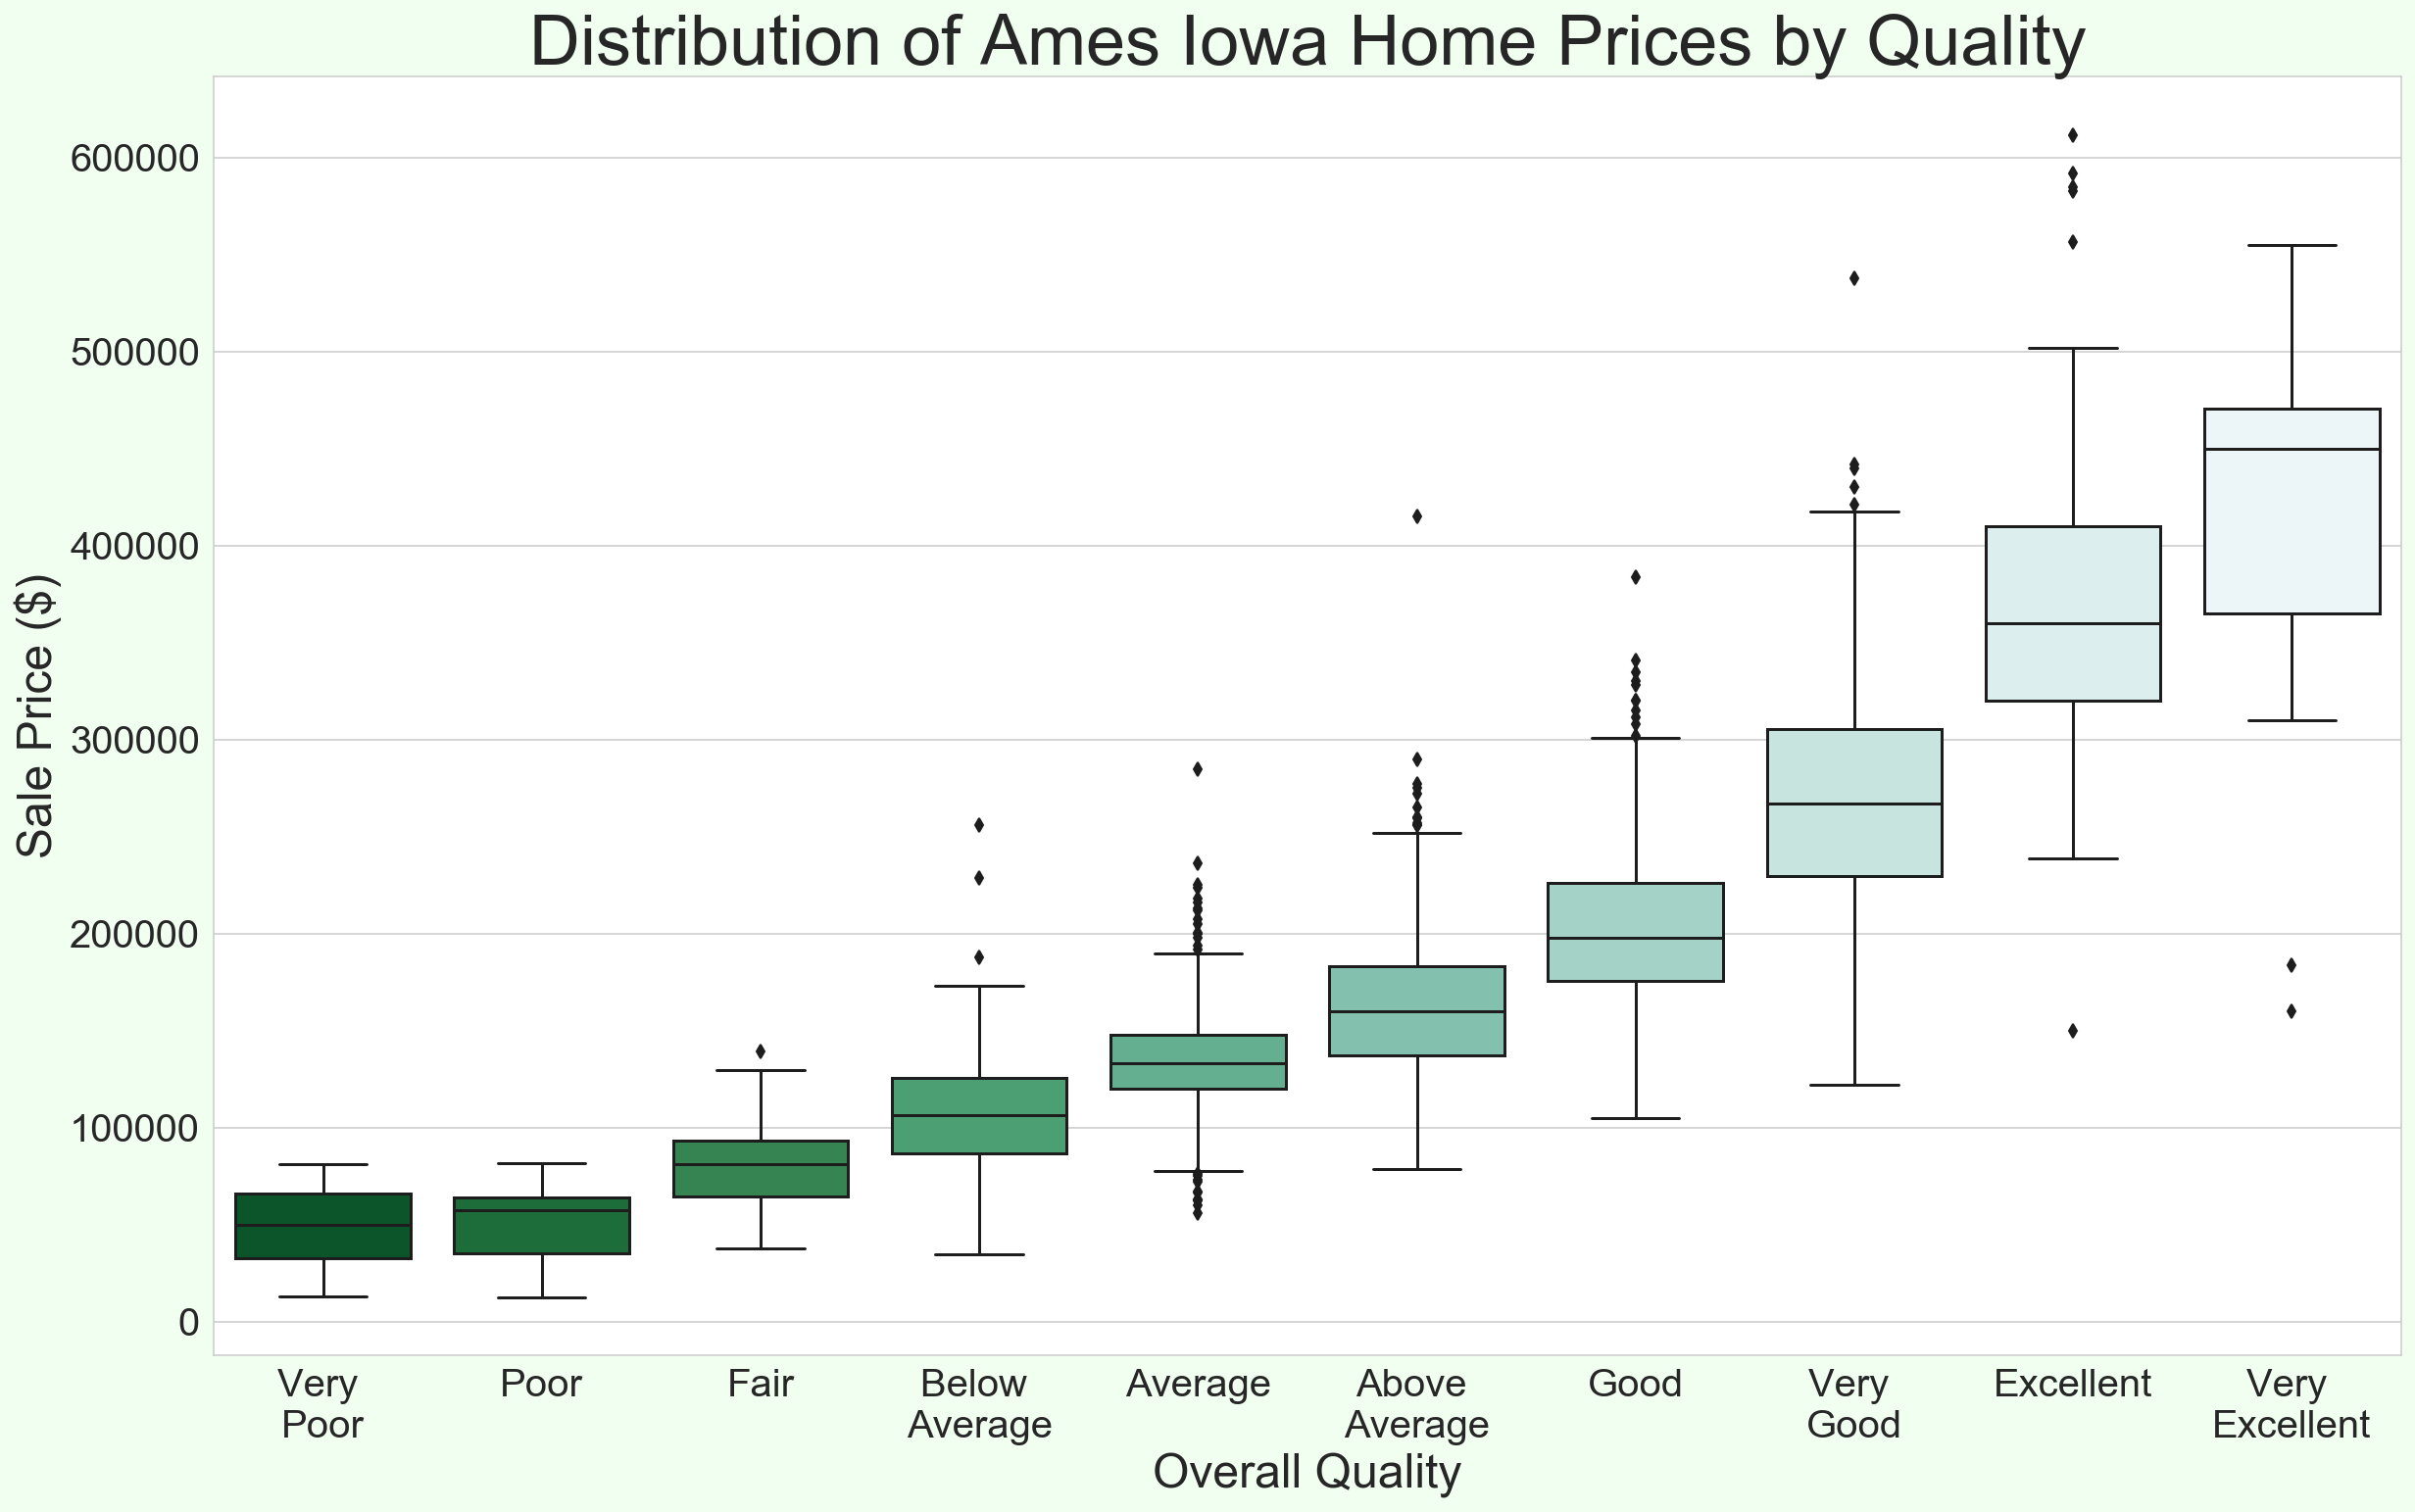

In [30]:
plt.figure(figsize=(20, 12), facecolor='honeydew')
plt.tick_params('both', labelsize=20)
plt.title('Distribution of Ames Iowa Home Prices by Quality', fontsize=36)
sns.boxplot(x=original_df.overall_qual, y=original_df.saleprice, palette='BuGn_r')
plt.xticks(np.arange(10), ['Very \nPoor', 'Poor', 'Fair', 'Below \nAverage', 'Average', 
                           'Above \nAverage','Good', 'Very \nGood', 'Excellent', 'Very \nExcellent'])
plt.ylabel('Sale Price ($)', fontsize=24)
plt.xlabel('Overall Quality', fontsize=24);

## Model Prediction Graph<a name="model"></a>

[back to top](#top)

In [152]:
X19 = h_df.drop('saleprice', axis=1).drop(
    ['sqrt_gr_liv_area', 'log_total_bsmt_sf', 
     'mas_vnr_area', 'roof_style', 'has_basement',
     'floating_village', 'commercial', 'ir2_lot', 'str_gravel', 'regular_lot',
     'full_bath', 'inter_qual_fv', 'fireplaces', 'total_bsmt_sf',
     'offsite_feature', 'northridge', 'culdesac', 
     'banked', 'roof_matl', 'briardale'], axis=1)
y19 = np.log(h_df['saleprice'])

X19_train, X19_test, y19_train, y19_test = train_test_split(X19, y19, random_state = 12, test_size=0.05)

ss = StandardScaler()
ss.fit(X19_train)
X19_train_sc = ss.transform(X19_train)
X19_test_sc = ss.transform(X19_test)

l_alphas = np.logspace(-5, 0, 1000)
lasso_model19 = LassoCV(alphas=l_alphas, cv=5)
lasso_model19 = lasso_model19.fit(X19_train_sc, y19_train)

print (lasso_model19.alpha_)

y_pred19 = lasso_model19.predict(X19_train_sc)
y_pred_test19 = lasso_model19.predict(X19_test_sc)

print(f'Train R2 - {r2_score(np.exp(y19_train), np.exp(y_pred19))}')
print(f'Test R2 - {r2_score(np.exp(y19_test), np.exp(y_pred_test19))}')
print(f'Cross Val Score - {cross_val_score(lasso_model19, X19_train_sc, y19_train, cv=5).mean()}')

resids19 = y19_train - y_pred19

/Users/mags/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/mags/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/Users/mags/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


4.174655289253135e-05
Train R2 - 0.9004305952216811
Test R2 - 0.8909355987900857
Cross Val Score - 0.8736965205888682


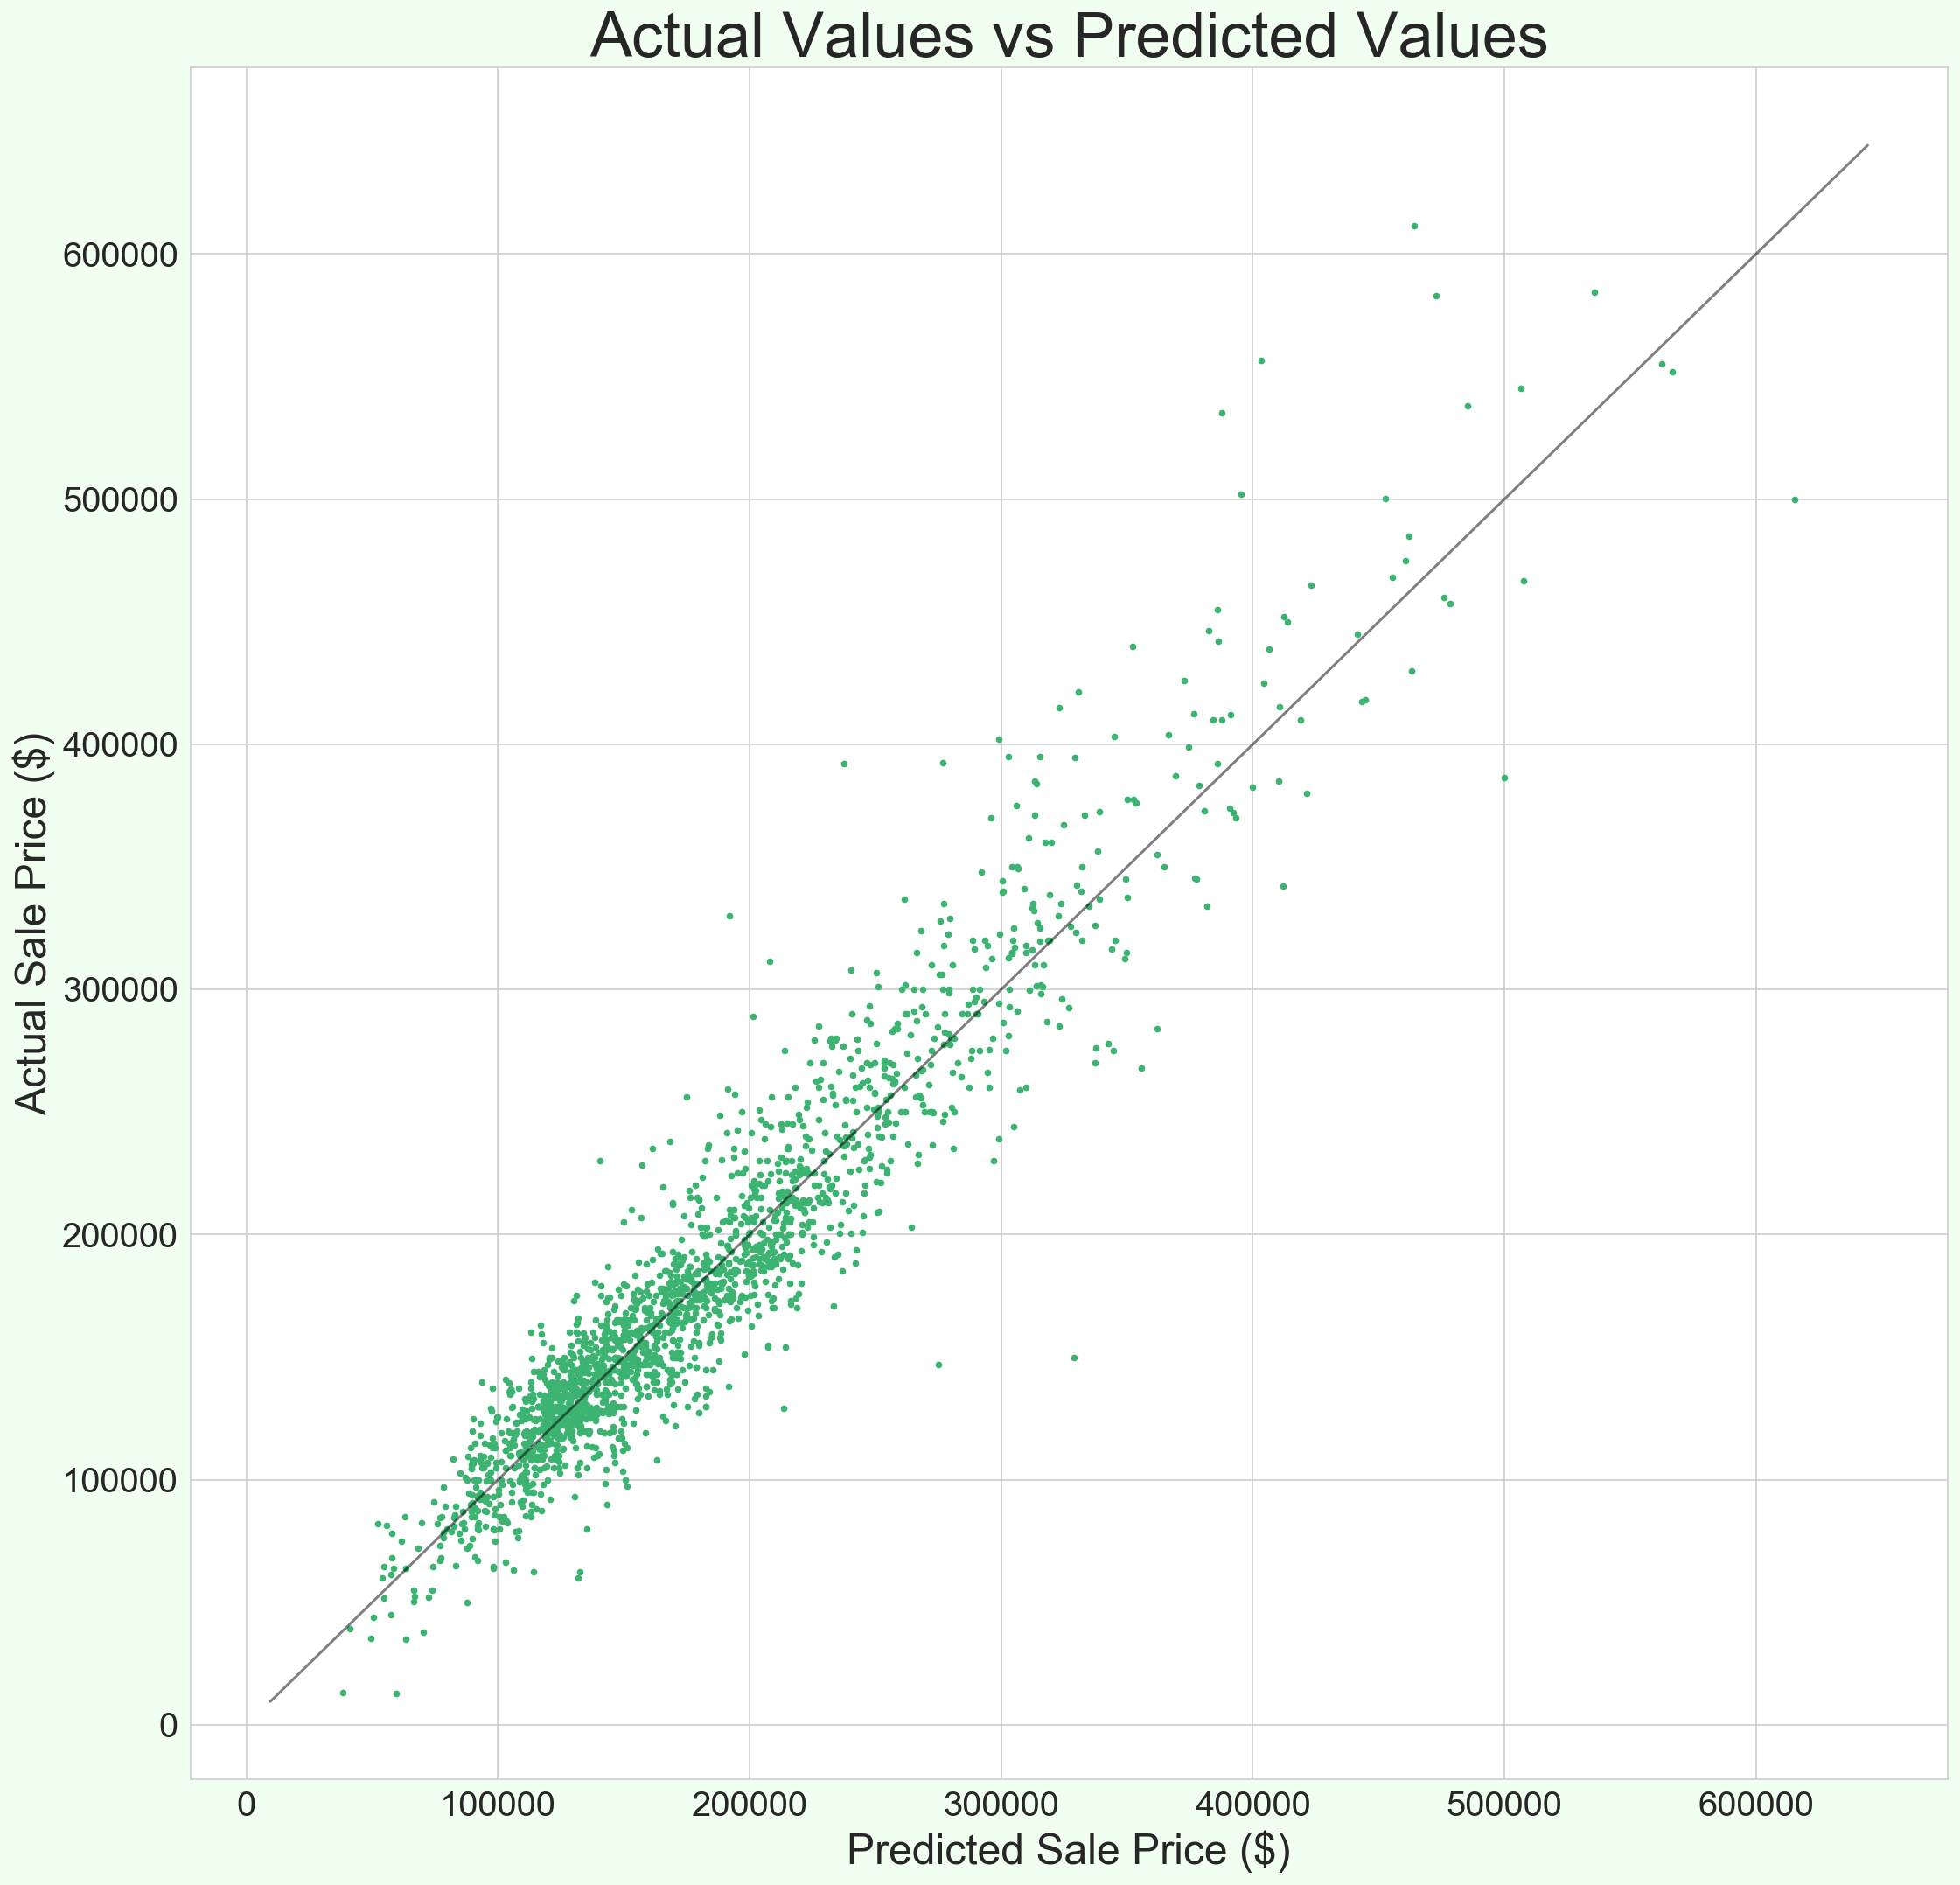

In [17]:
plt.figure(figsize=(18, 18), facecolor='honeydew')

plt.scatter(np.exp(y_pred19), np.exp(y19_train), color='mediumseagreen', s = 8)
plt.title('Actual Values vs Predicted Values', fontsize=36)

plt.tick_params('both', labelsize=20)
plt.xlabel('Predicted Sale Price ($)', fontsize=24)
plt.ylabel('Actual Sale Price ($)', fontsize=24)
x = np.linspace(*plt.xlim())
plt.plot(x, x, color='black', alpha=0.5);

## Quality Graphs<a name="quality"></a>

[back to top](#top)

In [53]:
# Creating hypothetical datasets for each quality to show how predicted values change
saleprices = pd.DataFrame()
for n in range (1, 11):
    
    str_n=str(n)
    index = 'saleprice'+str_n
    X19['overall_qual']= n
    X19_nsc = ss.transform(X19)
    saleprices[index] = np.exp(lasso_model19.predict(X19_nsc))

/Users/mags/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/Users/mags/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/Users/mags/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/Users/mags/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/Users/mags/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/Users/mags/anaconda3/lib/python3.7/site-packages/ipykernel_launc

In [54]:
saleprices.head()

,saleprice1,saleprice2,saleprice3,saleprice4,saleprice5,saleprice6,saleprice7,saleprice8,saleprice9,saleprice10
0,68881.651706,82503.627428,98819.473259,118361.926615,141769.078604,169805.208676,203385.739525,243607.127040,291782.661279,349485.347402
1,77030.419748,92263.888773,110509.915424,132364.260488,158540.501884,189893.334083,227446.475196,272426.092938,326300.840887,390829.812281
2,67143.535942,80421.783398,96325.925558,115375.257082,138191.767894,165520.452102,198253.633205,237460.099824,284420.003290,340666.656552
3,69826.684133,83635.548649,100175.242238,119985.811293,143714.101307,172134.877384,206176.121496,246949.332531,295785.818430,354280.165439
4,51438.731394,61611.210318,73795.389855,88389.102172,105868.854386,126805.387242,151882.310684,181918.424765,217894.454725,260985.073179


In [57]:
h_df.saleprice.head()

0    130500
1    220000
2    109000
3    174000
4    138500
Name: saleprice, dtype: int64

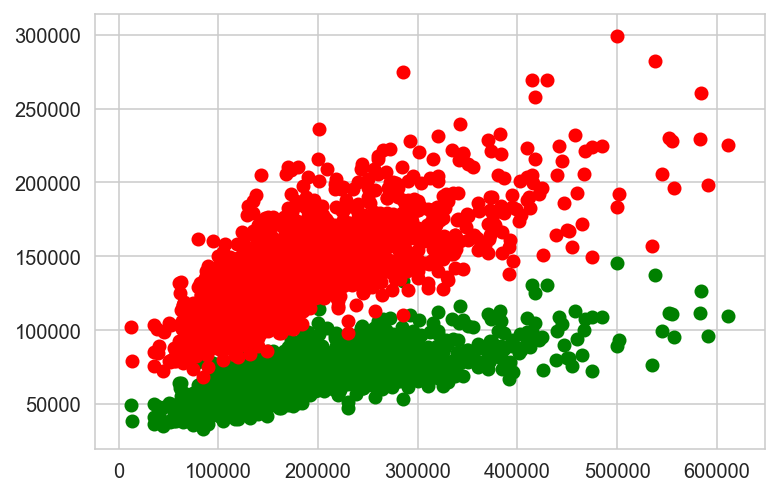

In [59]:
# Test scatter plots to determing logical x variable
plt.scatter(h_df.saleprice,saleprices['saleprice1'], color='g')
plt.scatter(h_df.saleprice,saleprices['saleprice5'], color='r')

''

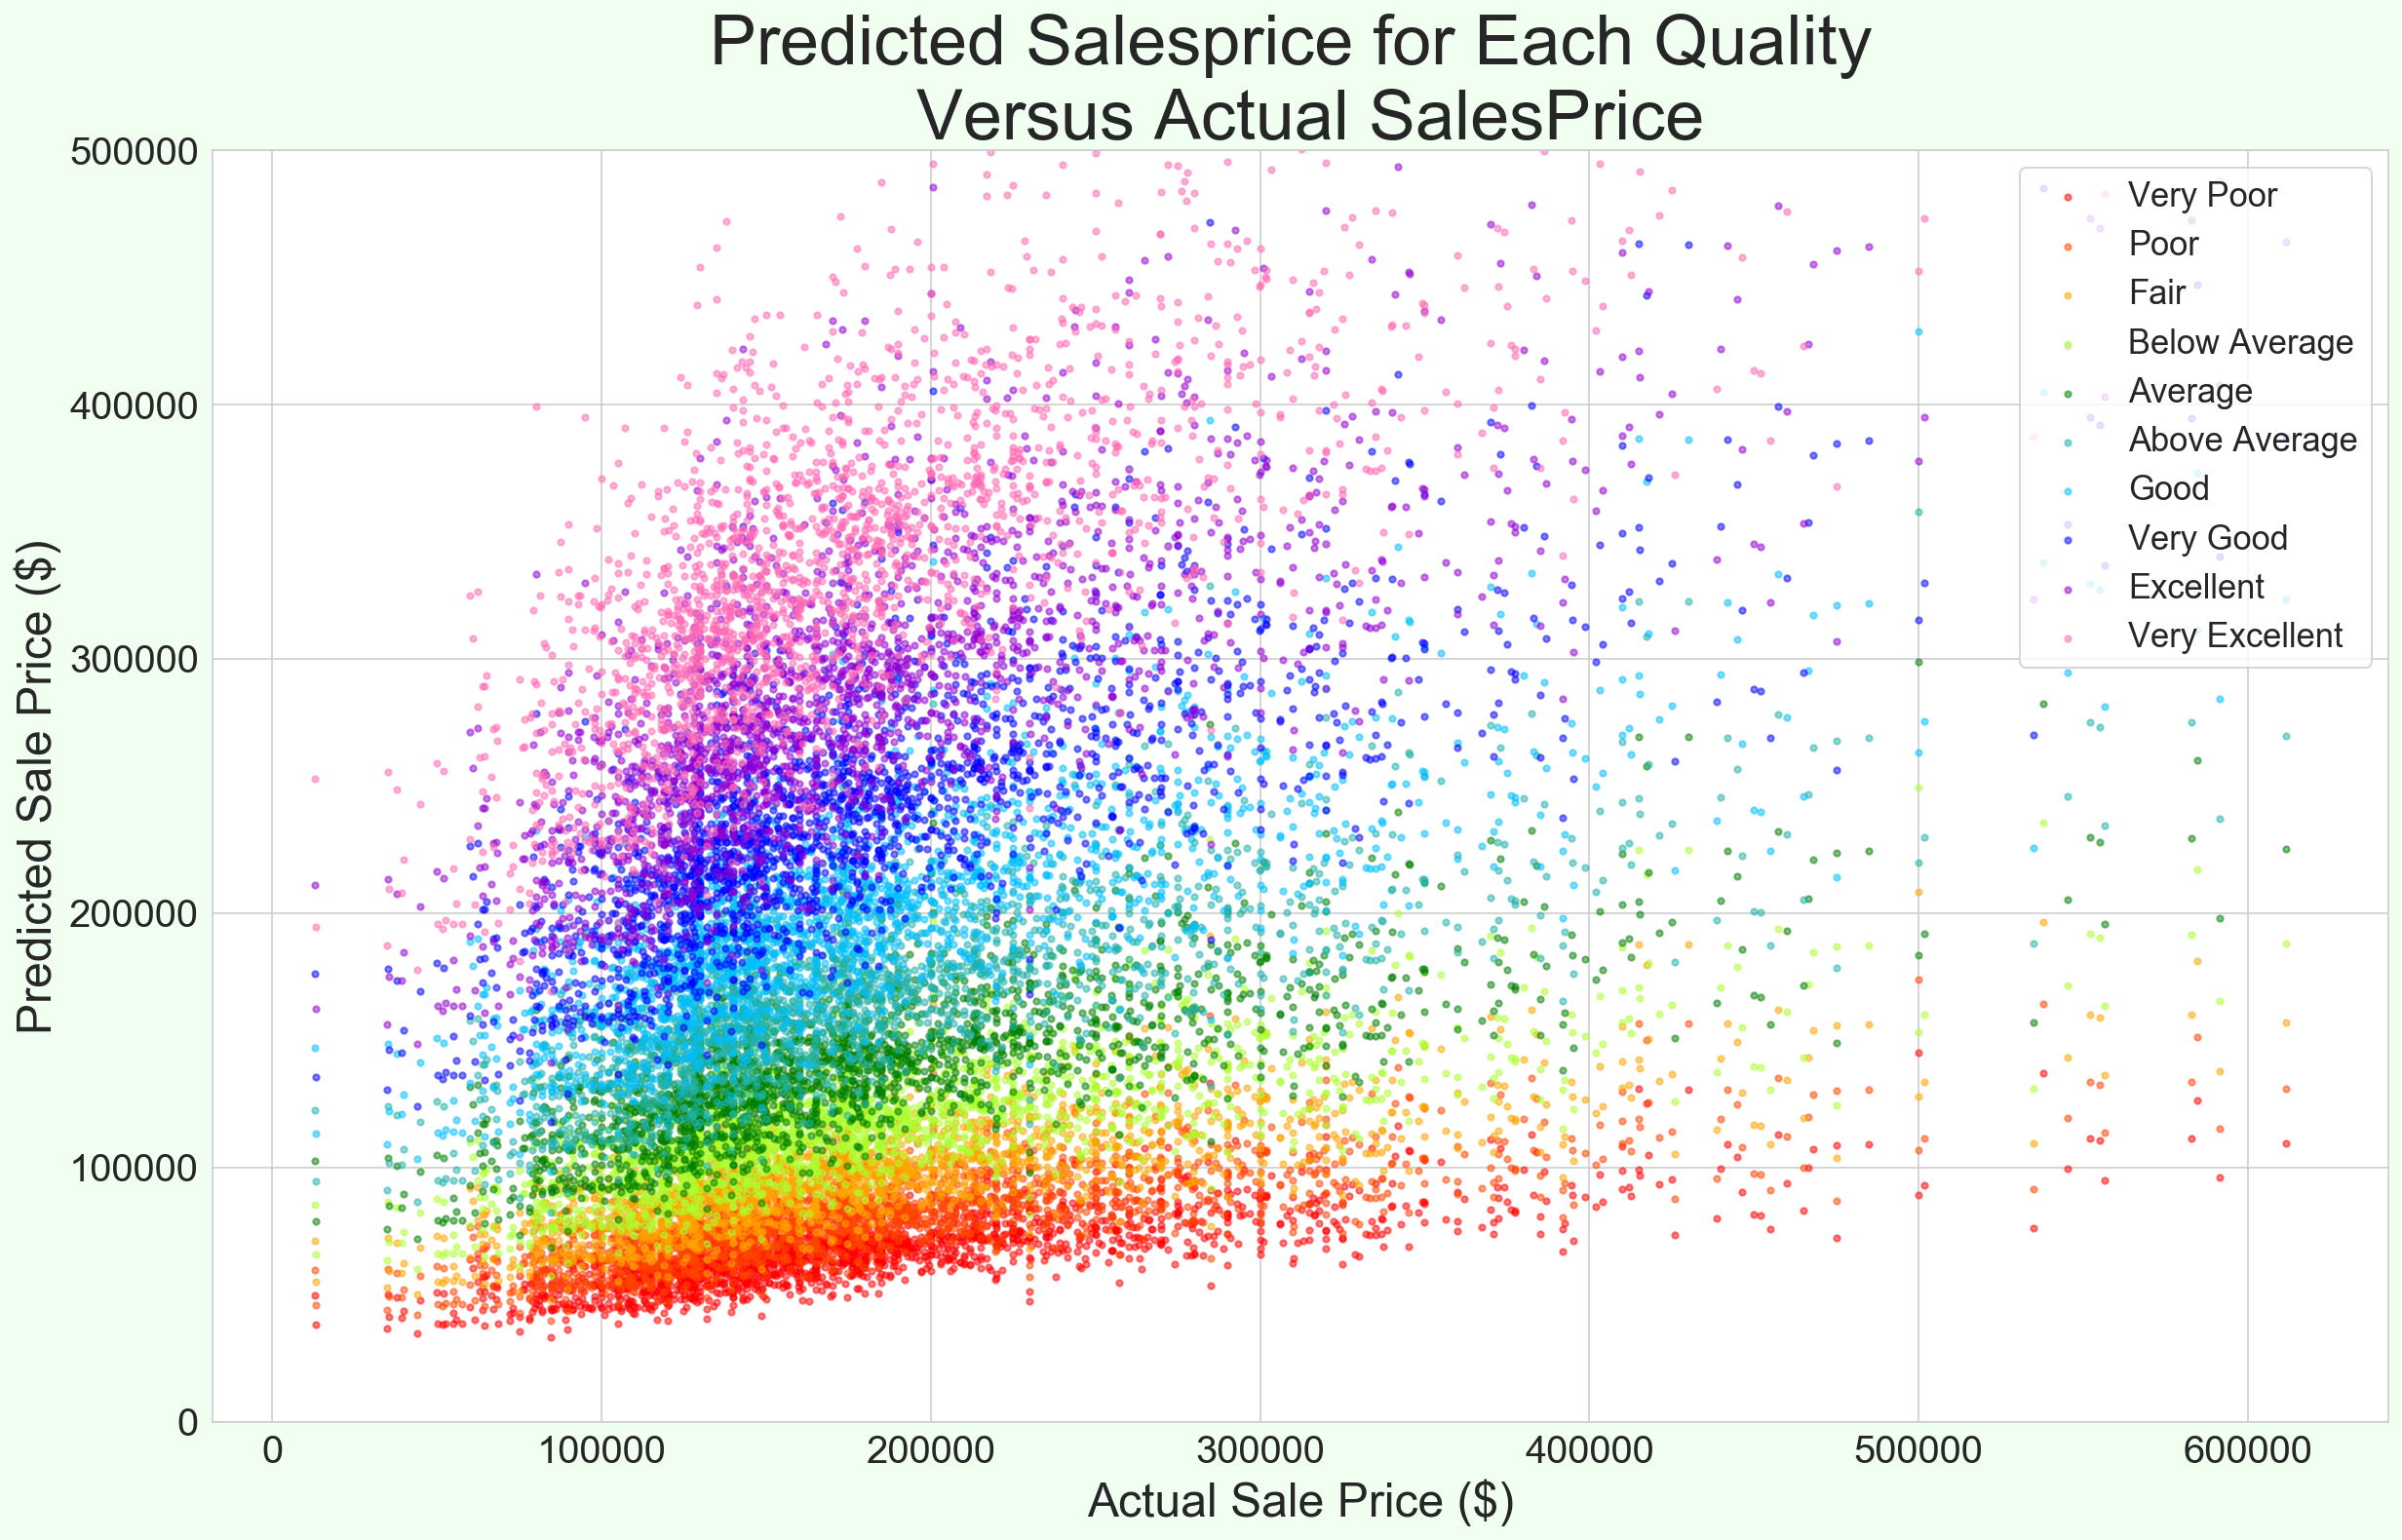

In [70]:
# matplotlib version in case I can't get bokeh to work...

colors = ['na', 'red', 'orangered', 'orange', 'greenyellow', 'green', 
         'lightseagreen', 'deepskyblue', 'blue', 'darkviolet', 'hotpink']

plt.figure(figsize=(20, 12), facecolor='honeydew')
plt.title('Predicted Salesprice for Each Quality \n Versus Actual SalesPrice', fontsize=36)
plt.tick_params('both', labelsize=20)
plt.xlabel('Actual Sale Price ($)', fontsize=24)
plt.ylabel('Predicted Sale Price ($)', fontsize=24)
plt.ylim(0,500000)

for n in range(1, 11):
    str_n=str(n)
    index = 'saleprice'+str_n
    plt.scatter(h_df.saleprice, saleprices[index], c=colors[n], s = 10, alpha = 0.5)
plt.legend(['Very Poor', 'Poor', 'Fair', 'Below Average', 'Average', 
            'Above Average','Good', 'Very Good', 'Excellent', 'Very Excellent'],
           loc=1, fontsize='xx-large'
          
          )
;

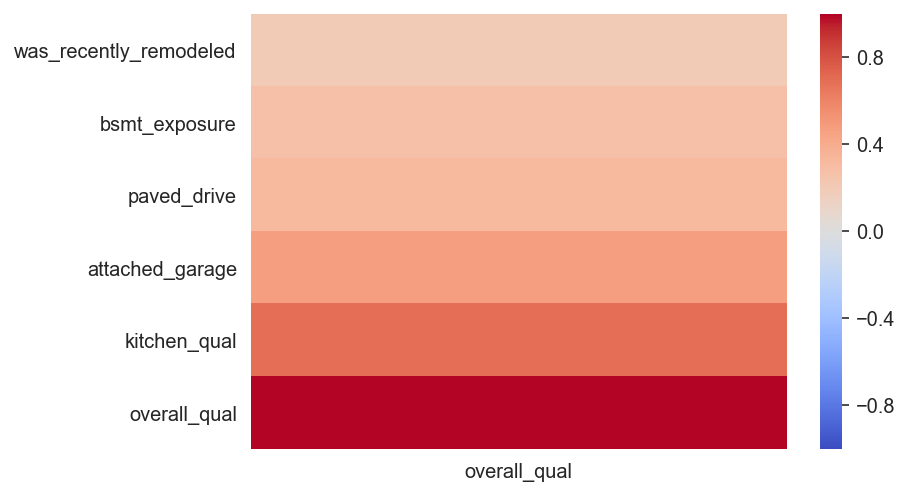

In [121]:
corr = h_df[['overall_qual', 'kitchen_qual', 'attached_garage', 'paved_drive', 'bsmt_exposure', 'was_recently_remodeled']].corr()['overall_qual'].sort_values()
corr =pd.DataFrame(corr)     
sns.heatmap(corr, cmap='viridis', vmin=-1)

In [124]:
original_df['was_recently_remodeled'] = h_df['was_recently_remodeled']
original_df['attached_garage'] = h_df['attached_garage']
original_df['kitchen_qual'] = h_df['kitchen_qual']
original_df['paved_drive'] = h_df['paved_drive']
original_df['bsmt_exposure'] = h_df['bsmt_exposure']

In [106]:
# adding variable per staphen suggestion
h_df['was_remodeled'] = original_df['year_remod/add'] == original_df['year_built']
h_df['was_remodeled'] = h_df['was_remodeled'].map({True:1, False:0})
h_df['was_recently_remodeled'] = (h_df['was_remodeled'] == 1) & (original_df['year_remod/add']>1990)
h_df['was_recently_remodeled'] = h_df['was_recently_remodeled'].map({True:1, False:0})

In [84]:
original_df['year_remod/add'].isnull().sum()

0

In [140]:
corr2 = original_df.drop('saleprice', axis=1).corr()['overall_qual'].sort_values(ascending=False)
corr2 =pd.DataFrame(corr2)
corr2

,overall_qual
overall_qual,1.000000
year_built,0.602964
garage_cars,0.587423
year_remod/add,0.584654
garage_yr_blt,0.574553
gr_liv_area,0.566701
garage_area,0.563814
total_bsmt_sf,0.548742
full_bath,0.515080
1st_flr_sf,0.477136


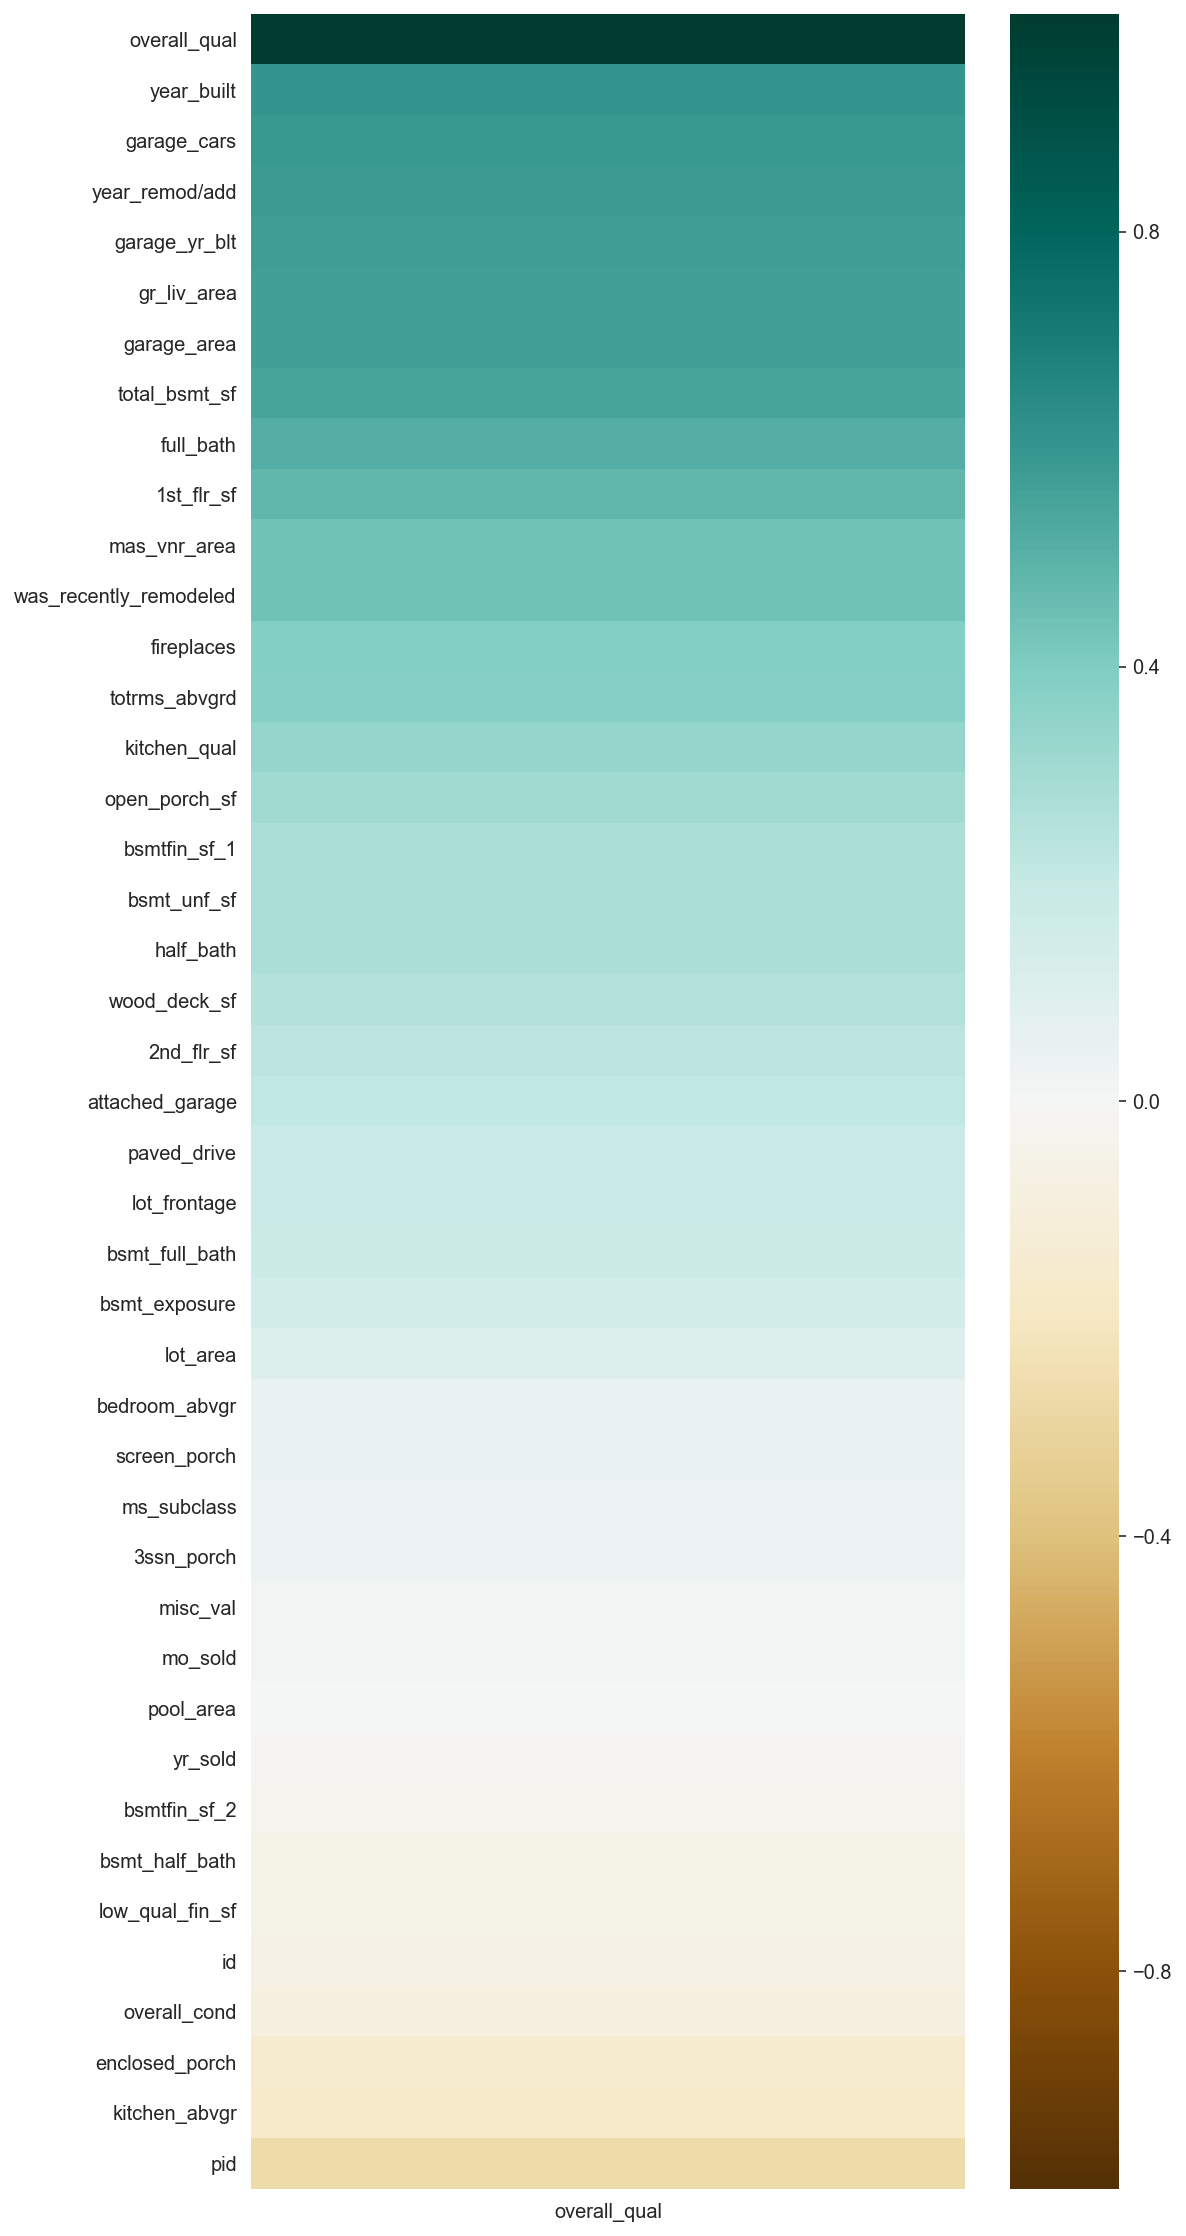

In [143]:
plt.figure(figsize=(8, 20))
sns.heatmap(corr2, cmap='BrBG', vmin=-1)

In [153]:
# Running simulation with and without a recent remodel: 
remodels = pd.DataFrame()
X19 = h_df.drop('saleprice', axis=1).drop(
    ['sqrt_gr_liv_area', 'log_total_bsmt_sf', 
     'mas_vnr_area', 'roof_style', 'has_basement',
     'floating_village', 'commercial', 'ir2_lot', 'str_gravel', 'regular_lot',
     'full_bath', 'inter_qual_fv', 'fireplaces', 'total_bsmt_sf',
     'offsite_feature', 'northridge', 'culdesac', 
     'banked', 'roof_matl', 'briardale'], axis=1)

X19['was_recently_remodeled'] = 1
X19_nsc = ss.transform(X19)
remodels['Yes'] = np.exp(lasso_model19.predict(X19_nsc))

X19['was_recently_remodeled'] = 0
X19_nsc = ss.transform(X19)
remodels['No'] = np.exp(lasso_model19.predict(X19_nsc))

/Users/mags/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':
/Users/mags/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


In [154]:
remodels['No'].mean()

179899.44356550273

In [155]:
remodels['Yes'].mean()

179899.44356550273

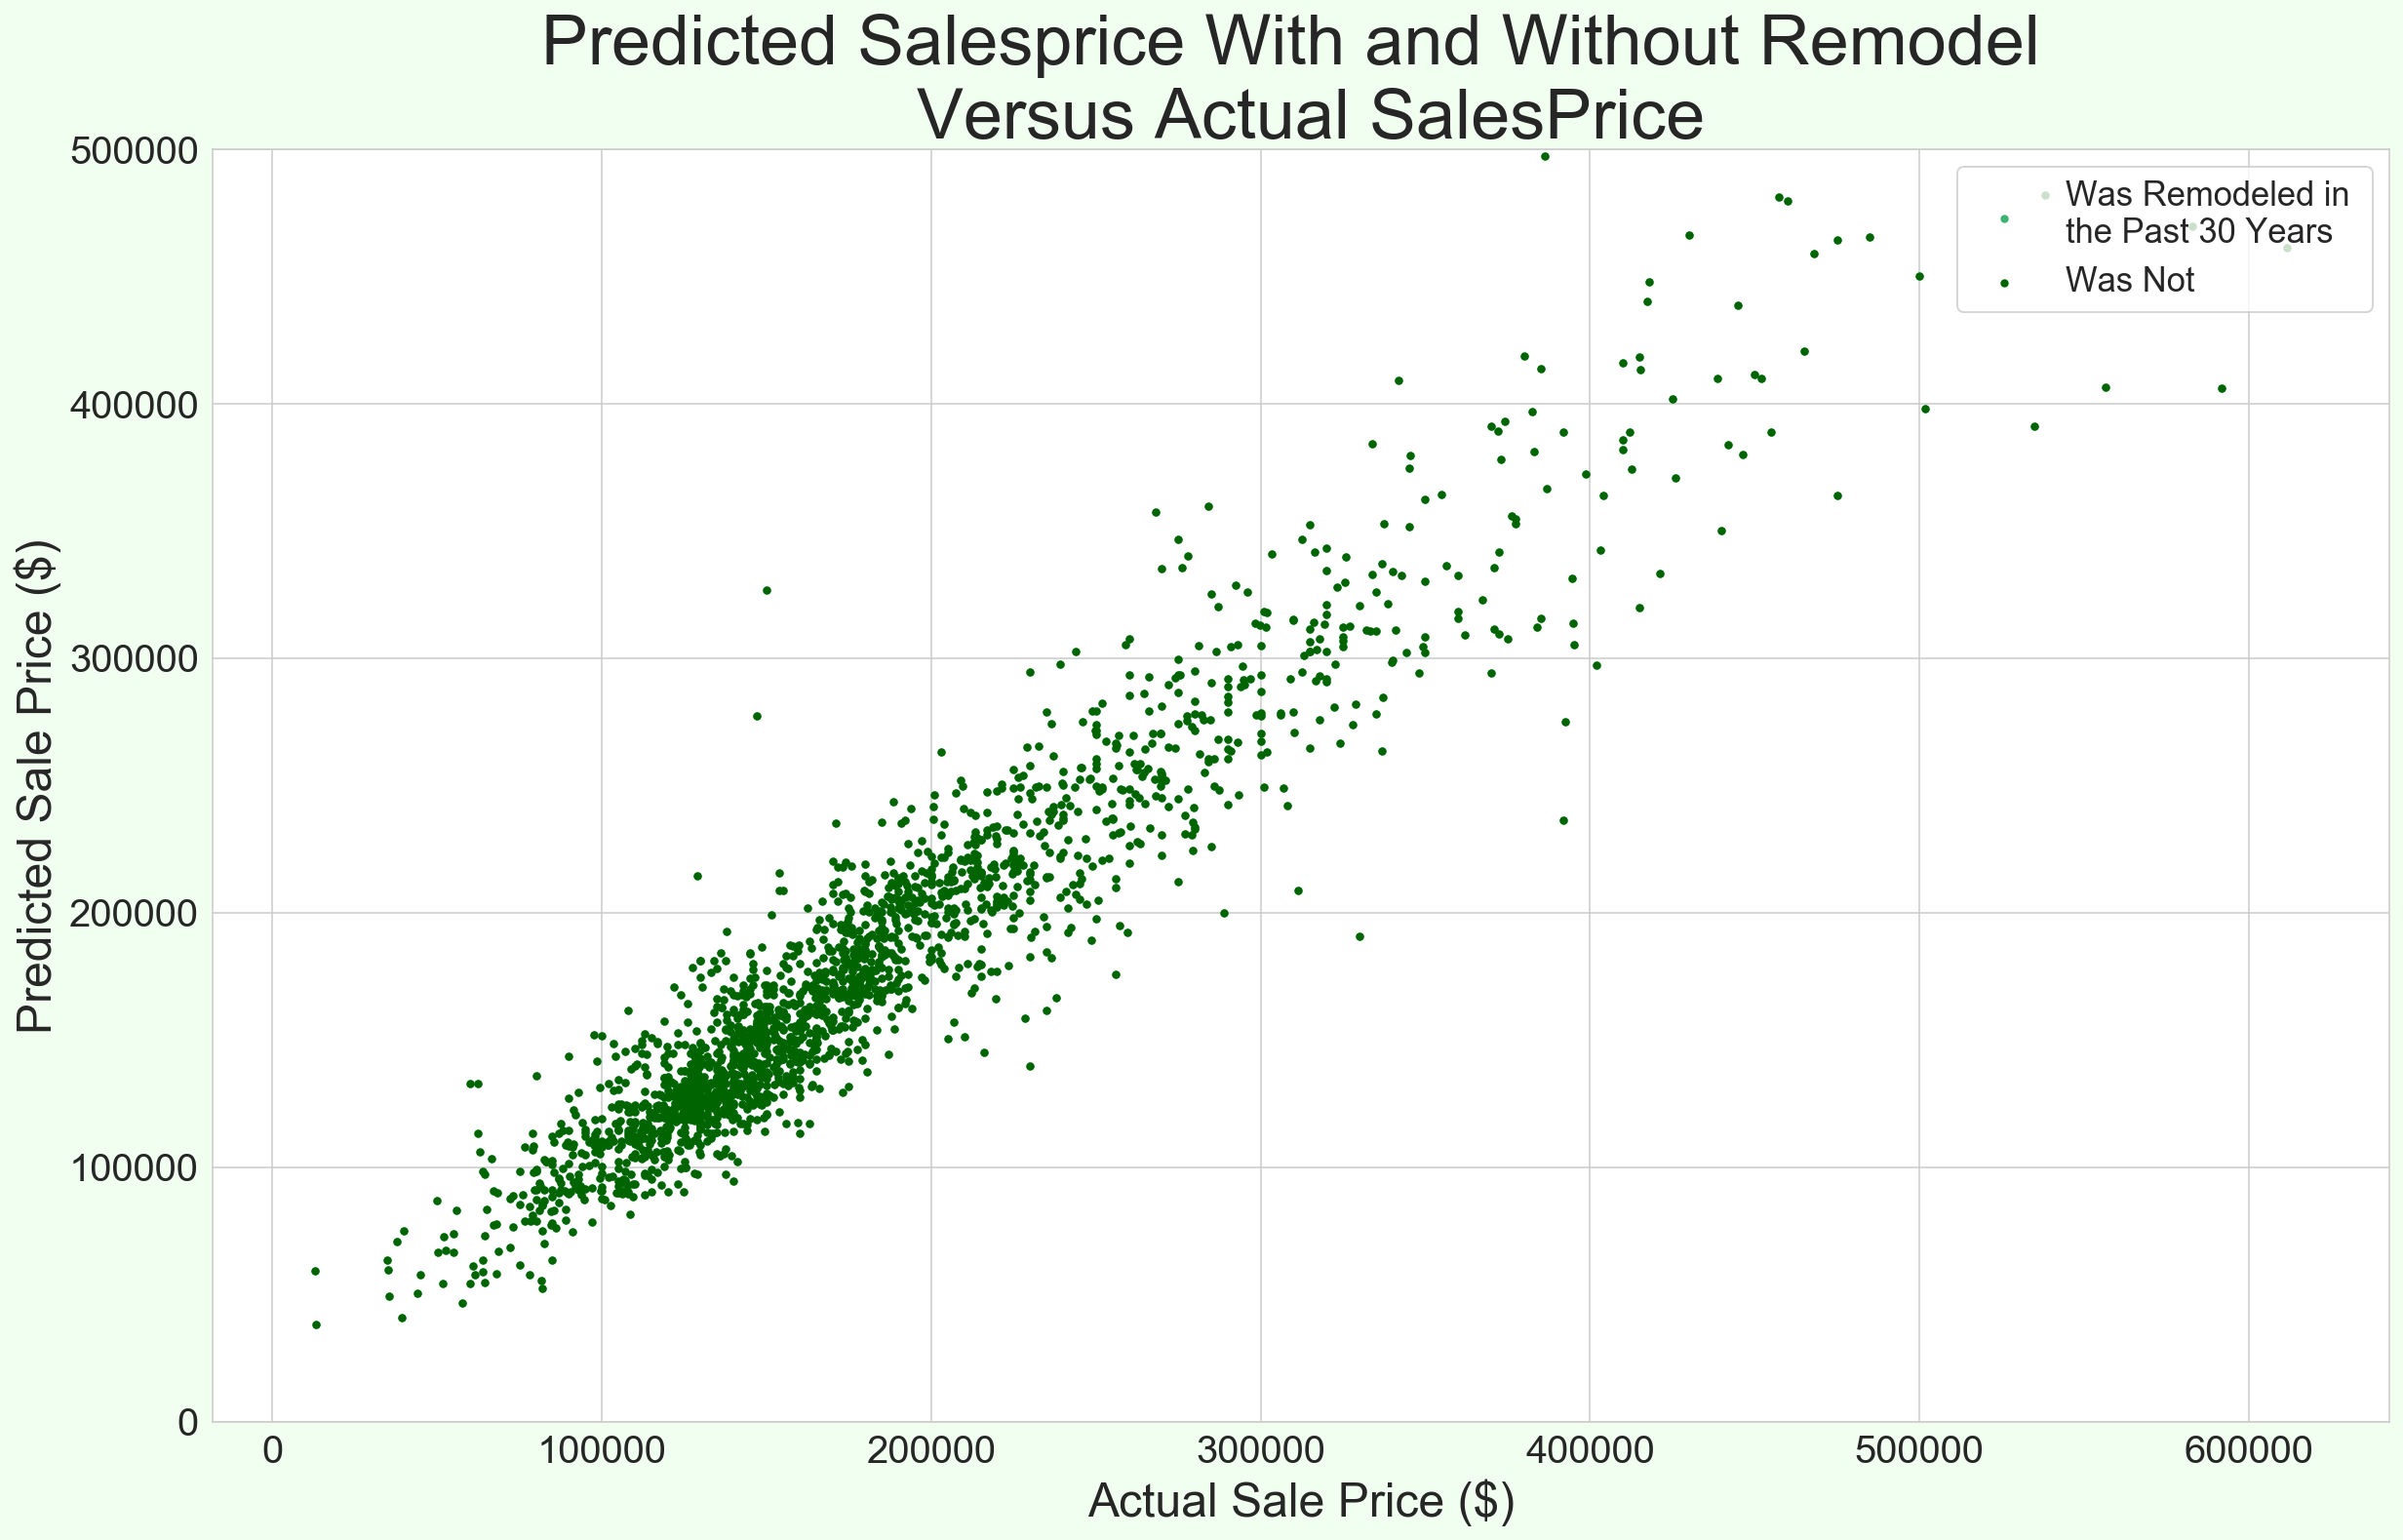

In [149]:
# Plotting predicted home price difference if there is or isn't a remodel

plt.figure(figsize=(20, 12), facecolor='honeydew')
plt.title('Predicted Salesprice With and Without Remodel \n Versus Actual SalesPrice', fontsize=36)
plt.tick_params('both', labelsize=20)
plt.xlabel('Actual Sale Price ($)', fontsize=24)
plt.ylabel('Predicted Sale Price ($)', fontsize=24)
plt.ylim(0,500000)
plt.scatter(h_df.saleprice, remodels['Yes'], c='mediumseagreen', s = 10)
plt.scatter(h_df.saleprice, remodels['No'], c='darkgreen', s = 10)
    
plt.legend(['Was Remodeled in \nthe Past 30 Years', 'Was Not'],
           loc=1, fontsize='xx-large');

Text(0.5, 0, 'Remodeled In Past 30 Years')

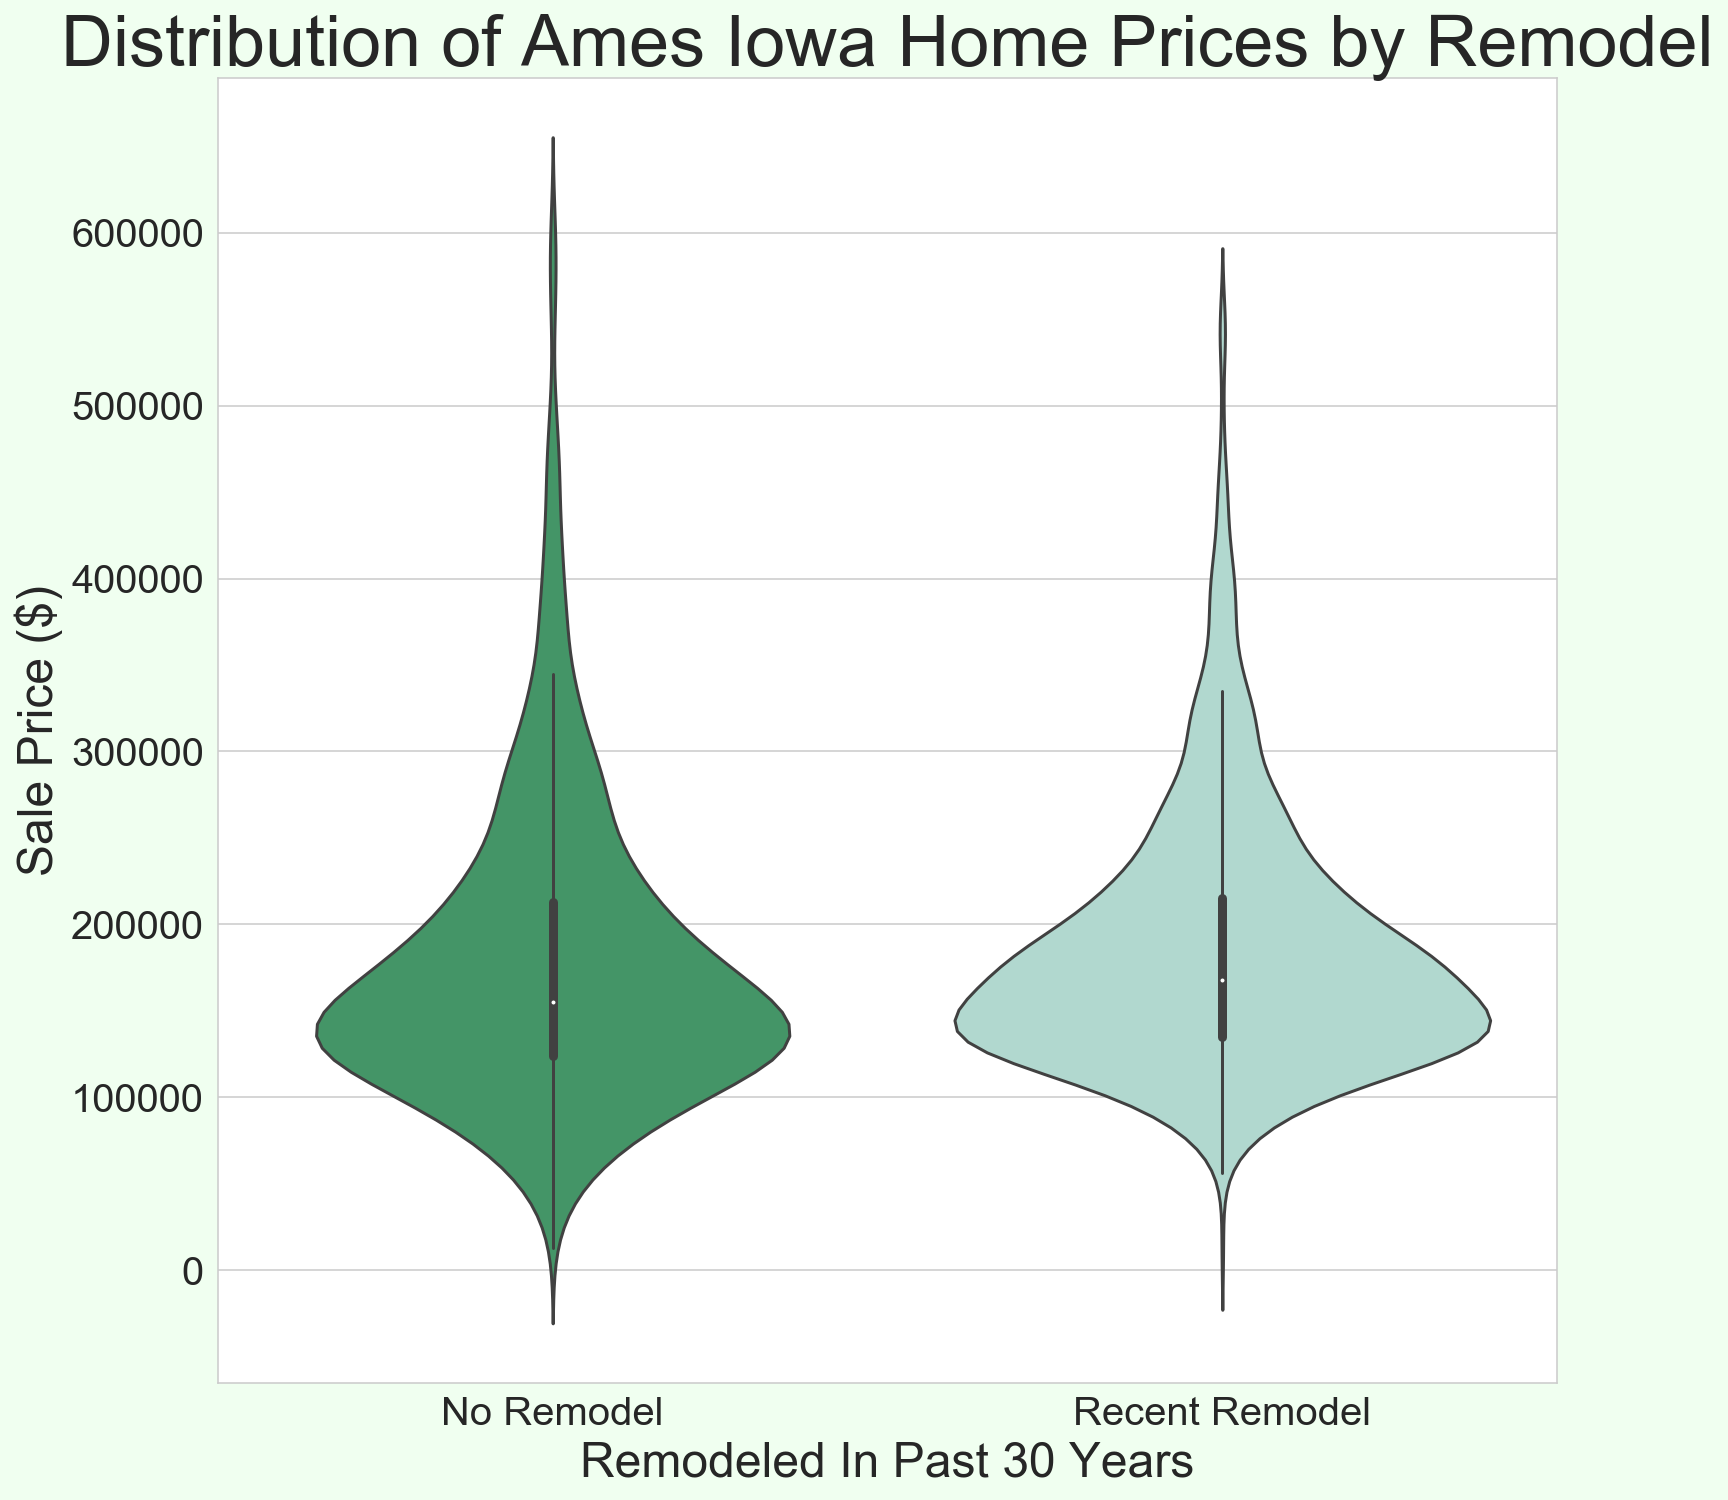

In [172]:
plt.figure(figsize=(12, 12), facecolor='honeydew')
plt.tick_params('both', labelsize=20)
plt.title('Distribution of Ames Iowa Home Prices by Remodel', fontsize=36)
sns.violinplot(x=h_df.was_remodeled, y=original_df.saleprice, palette='BuGn_r')
plt.xticks(np.arange(2), ['No Remodel', 'Recent Remodel'])
plt.ylabel('Sale Price ($)', fontsize=24)
plt.xlabel('Remodeled In Past 30 Years', fontsize=24)

([<matplotlib.axis.YTick at 0x1a13b34fd0>,
 <a list of 10 Text yticklabel objects>)

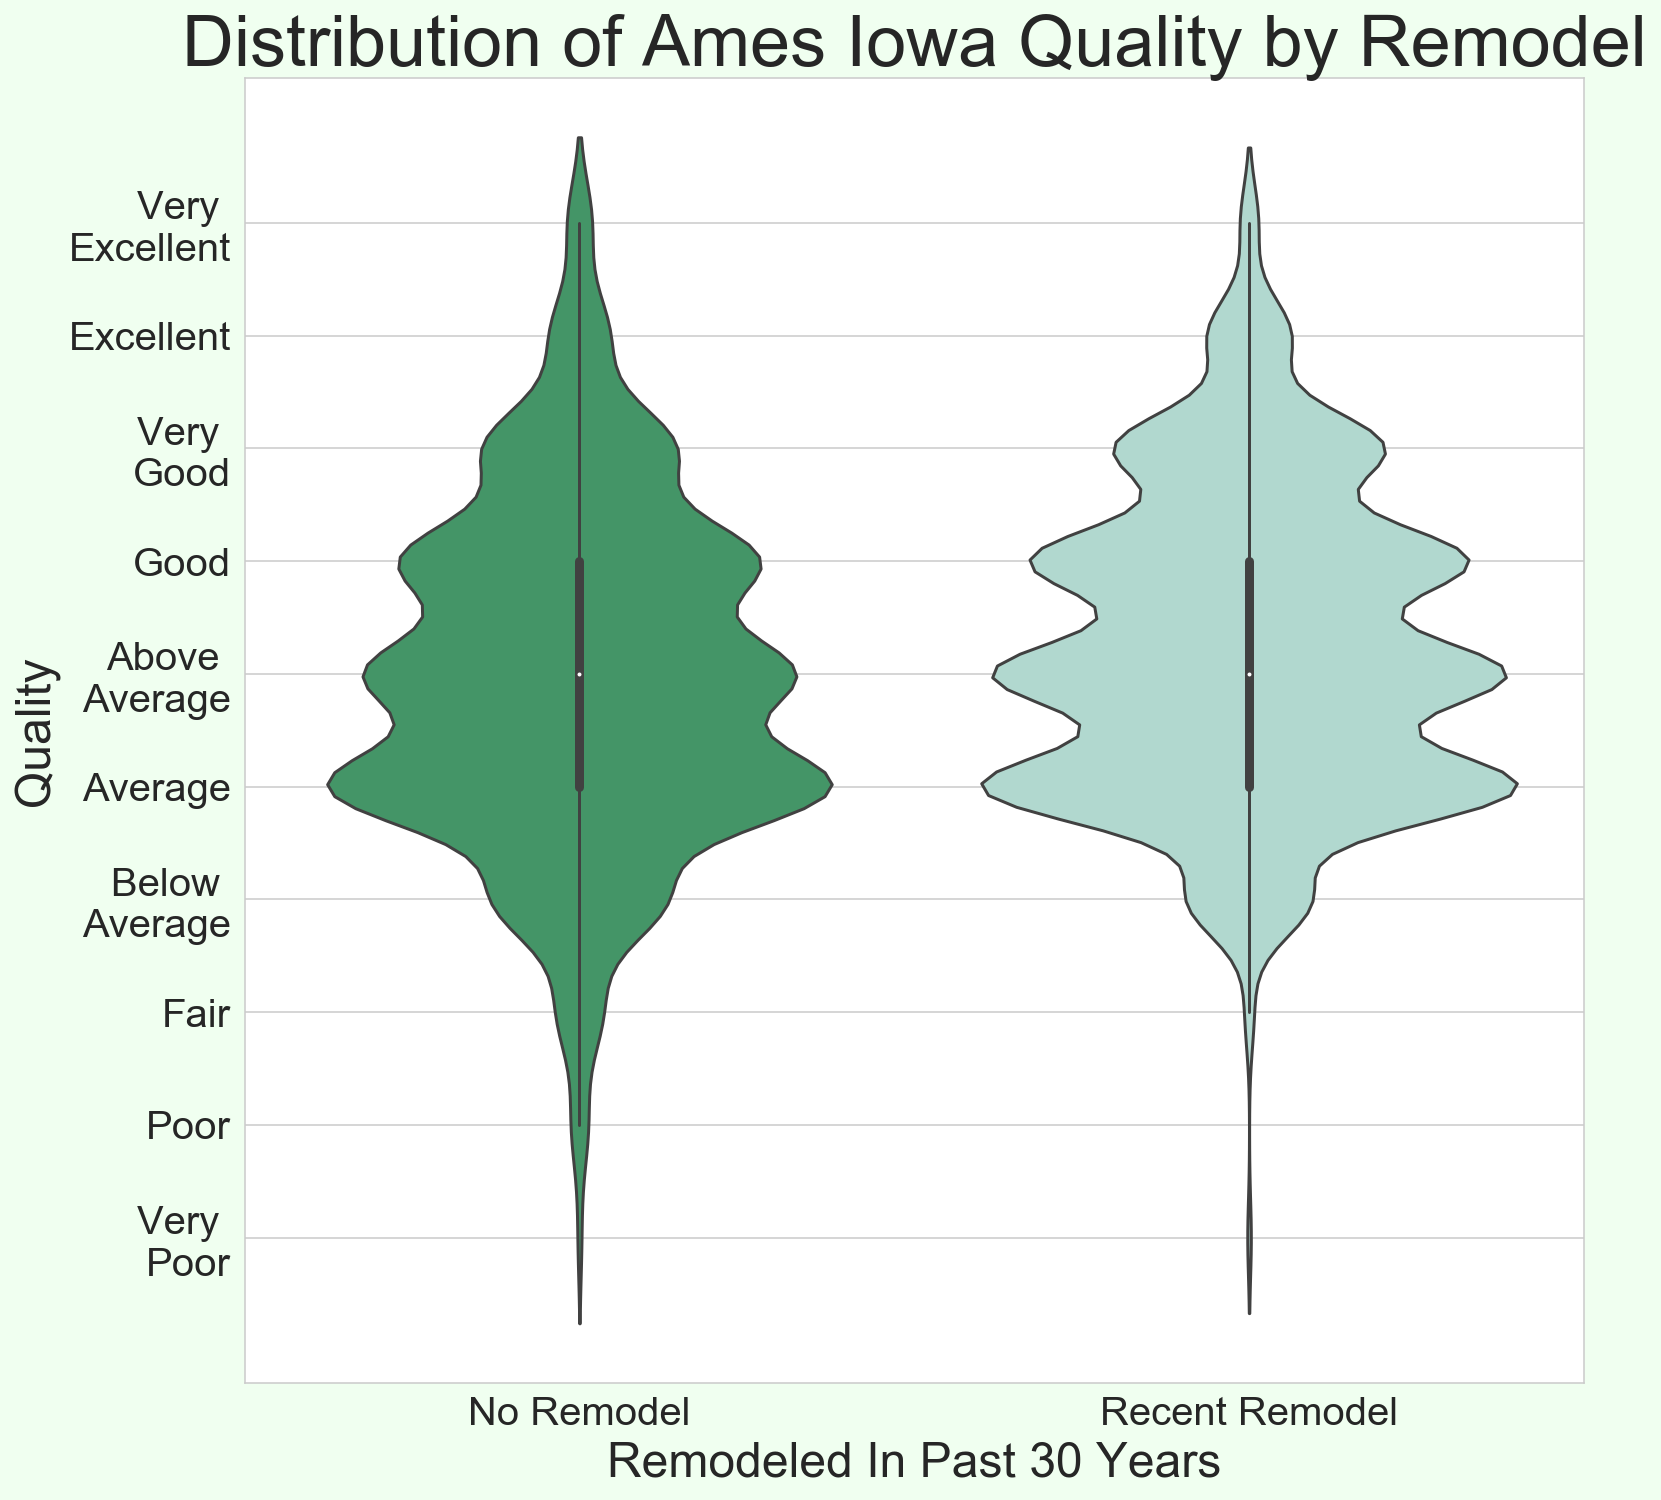

In [168]:
plt.figure(figsize=(12, 12), facecolor='honeydew')
plt.tick_params('both', labelsize=20)
plt.title('Distribution of Ames Iowa Quality by Remodel', fontsize=36)
sns.violinplot(x=h_df.was_remodeled, y=original_df.overall_qual, palette='BuGn_r')
plt.xticks(np.arange(2), ['No Remodel', 'Recent Remodel'])
plt.ylabel('Quality', fontsize=24)
plt.xlabel('Remodeled In Past 30 Years', fontsize=24)
plt.yticks(np.arange(1,11), ['Very \nPoor', 'Poor', 'Fair', 'Below \nAverage', 'Average', 
                           'Above \nAverage','Good', 'Very \nGood', 'Excellent', 'Very \nExcellent'])

In [186]:
h_df.groupby('paved_drive').saleprice.mean()[1] - \
h_df.groupby('paved_drive').saleprice.mean()[0]

79062.19985560996

In [185]:
h_df.groupby('paved_drive').overall_qual.mean()[1] - \
h_df.groupby('paved_drive').overall_qual.mean()[0]

1.5696894198918487

Text(0.5, 0, 'Driveway Type')

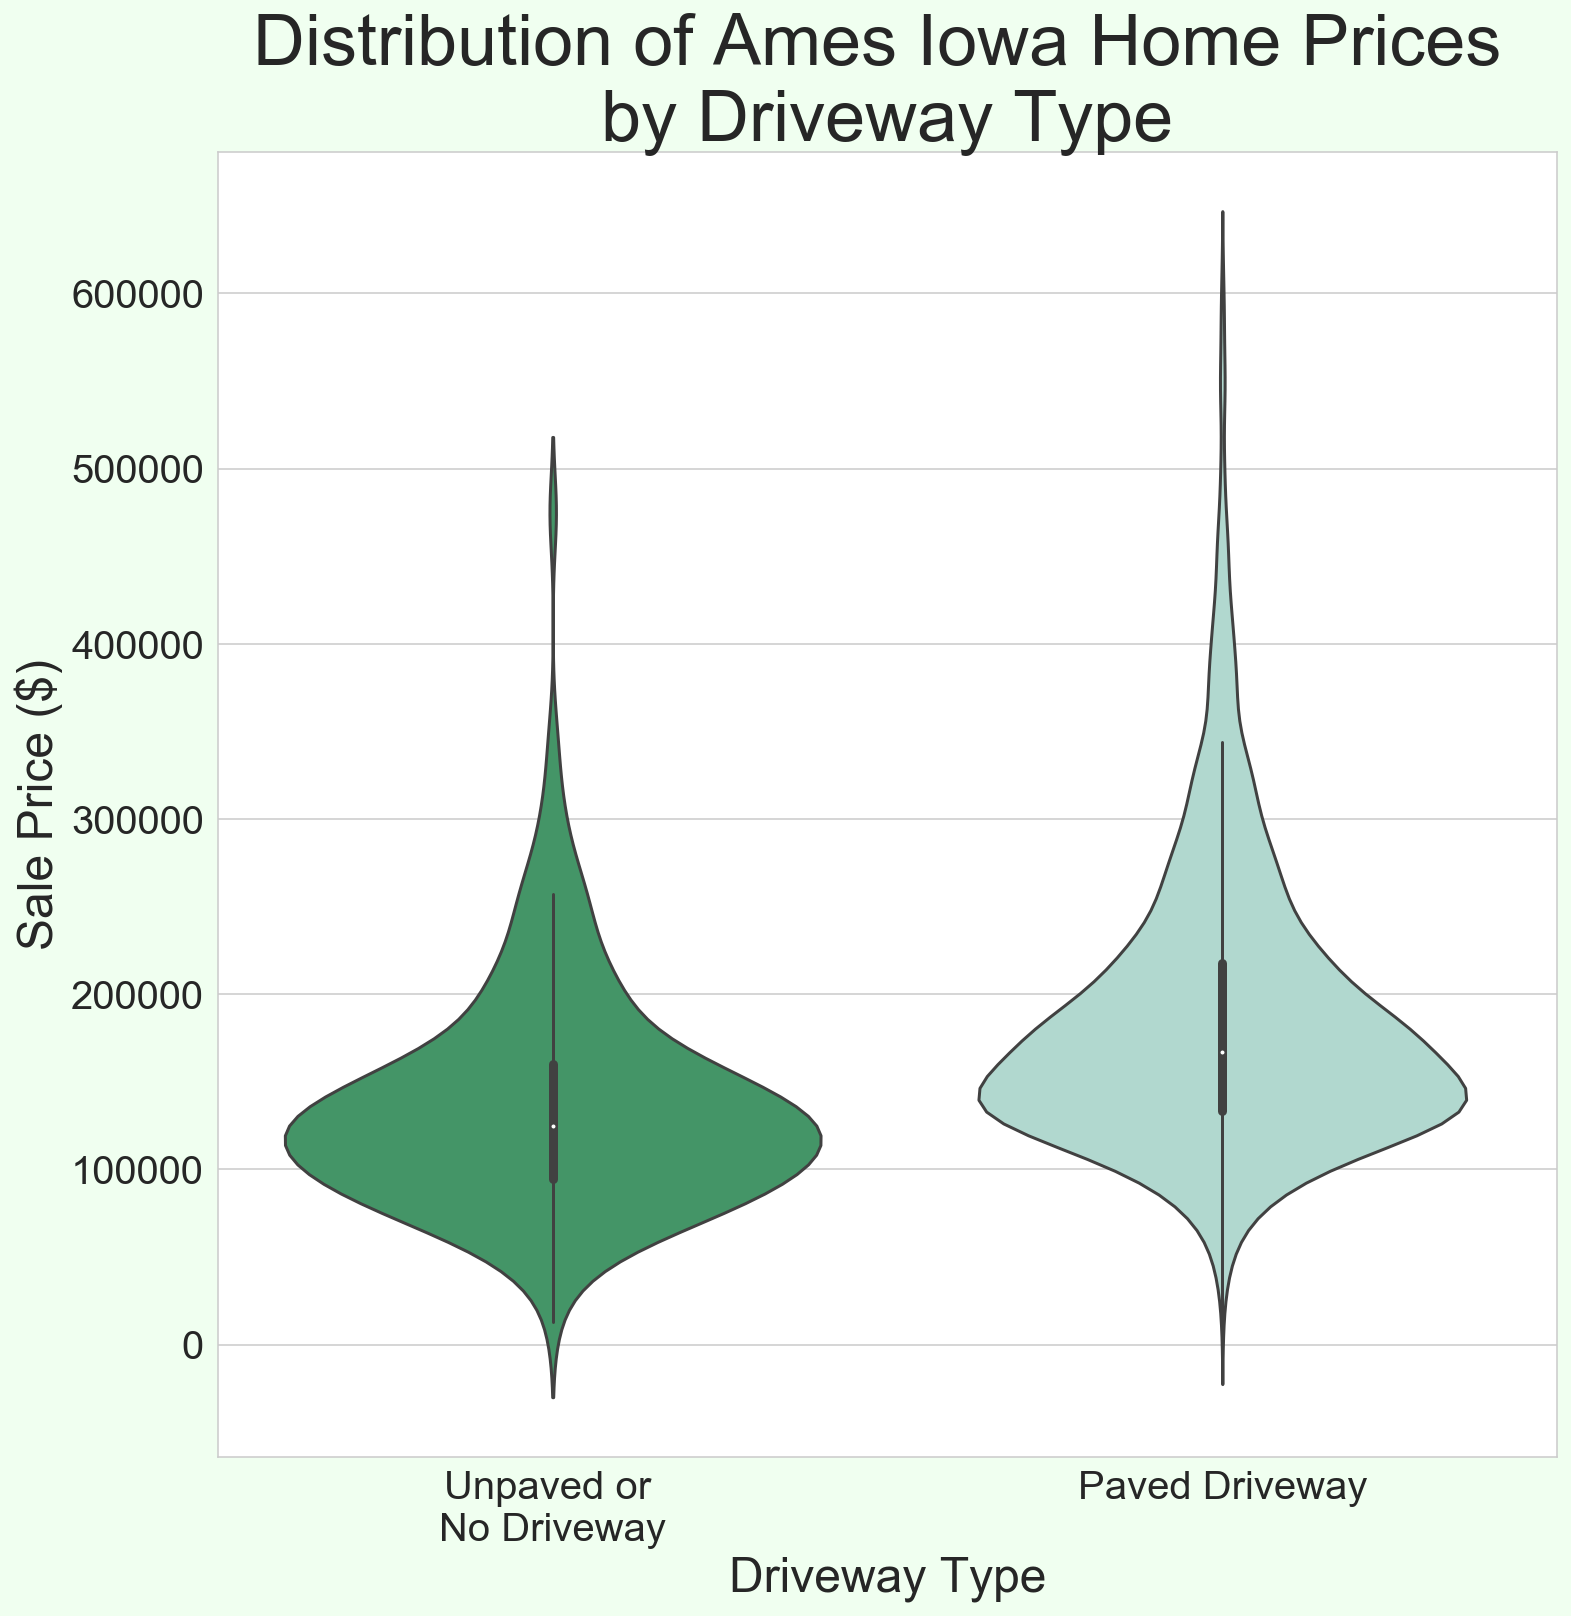

In [181]:
plt.figure(figsize=(12, 12), facecolor='honeydew')
plt.tick_params('both', labelsize=20)
plt.title('Distribution of Ames Iowa Home Prices \nby Paved Driveway', fontsize=36)
sns.violinplot(x=h_df.paved_drive, y=original_df.saleprice, palette='BuGn_r')
plt.xticks(np.arange(2), ['Unpaved or \nNo Driveway', 'Paved Driveway'])
plt.ylabel('Sale Price ($)', fontsize=24)
plt.xlabel('Driveway Type', fontsize=24)

([<matplotlib.axis.YTick at 0x1a157cd198>,
 <a list of 10 Text yticklabel objects>)

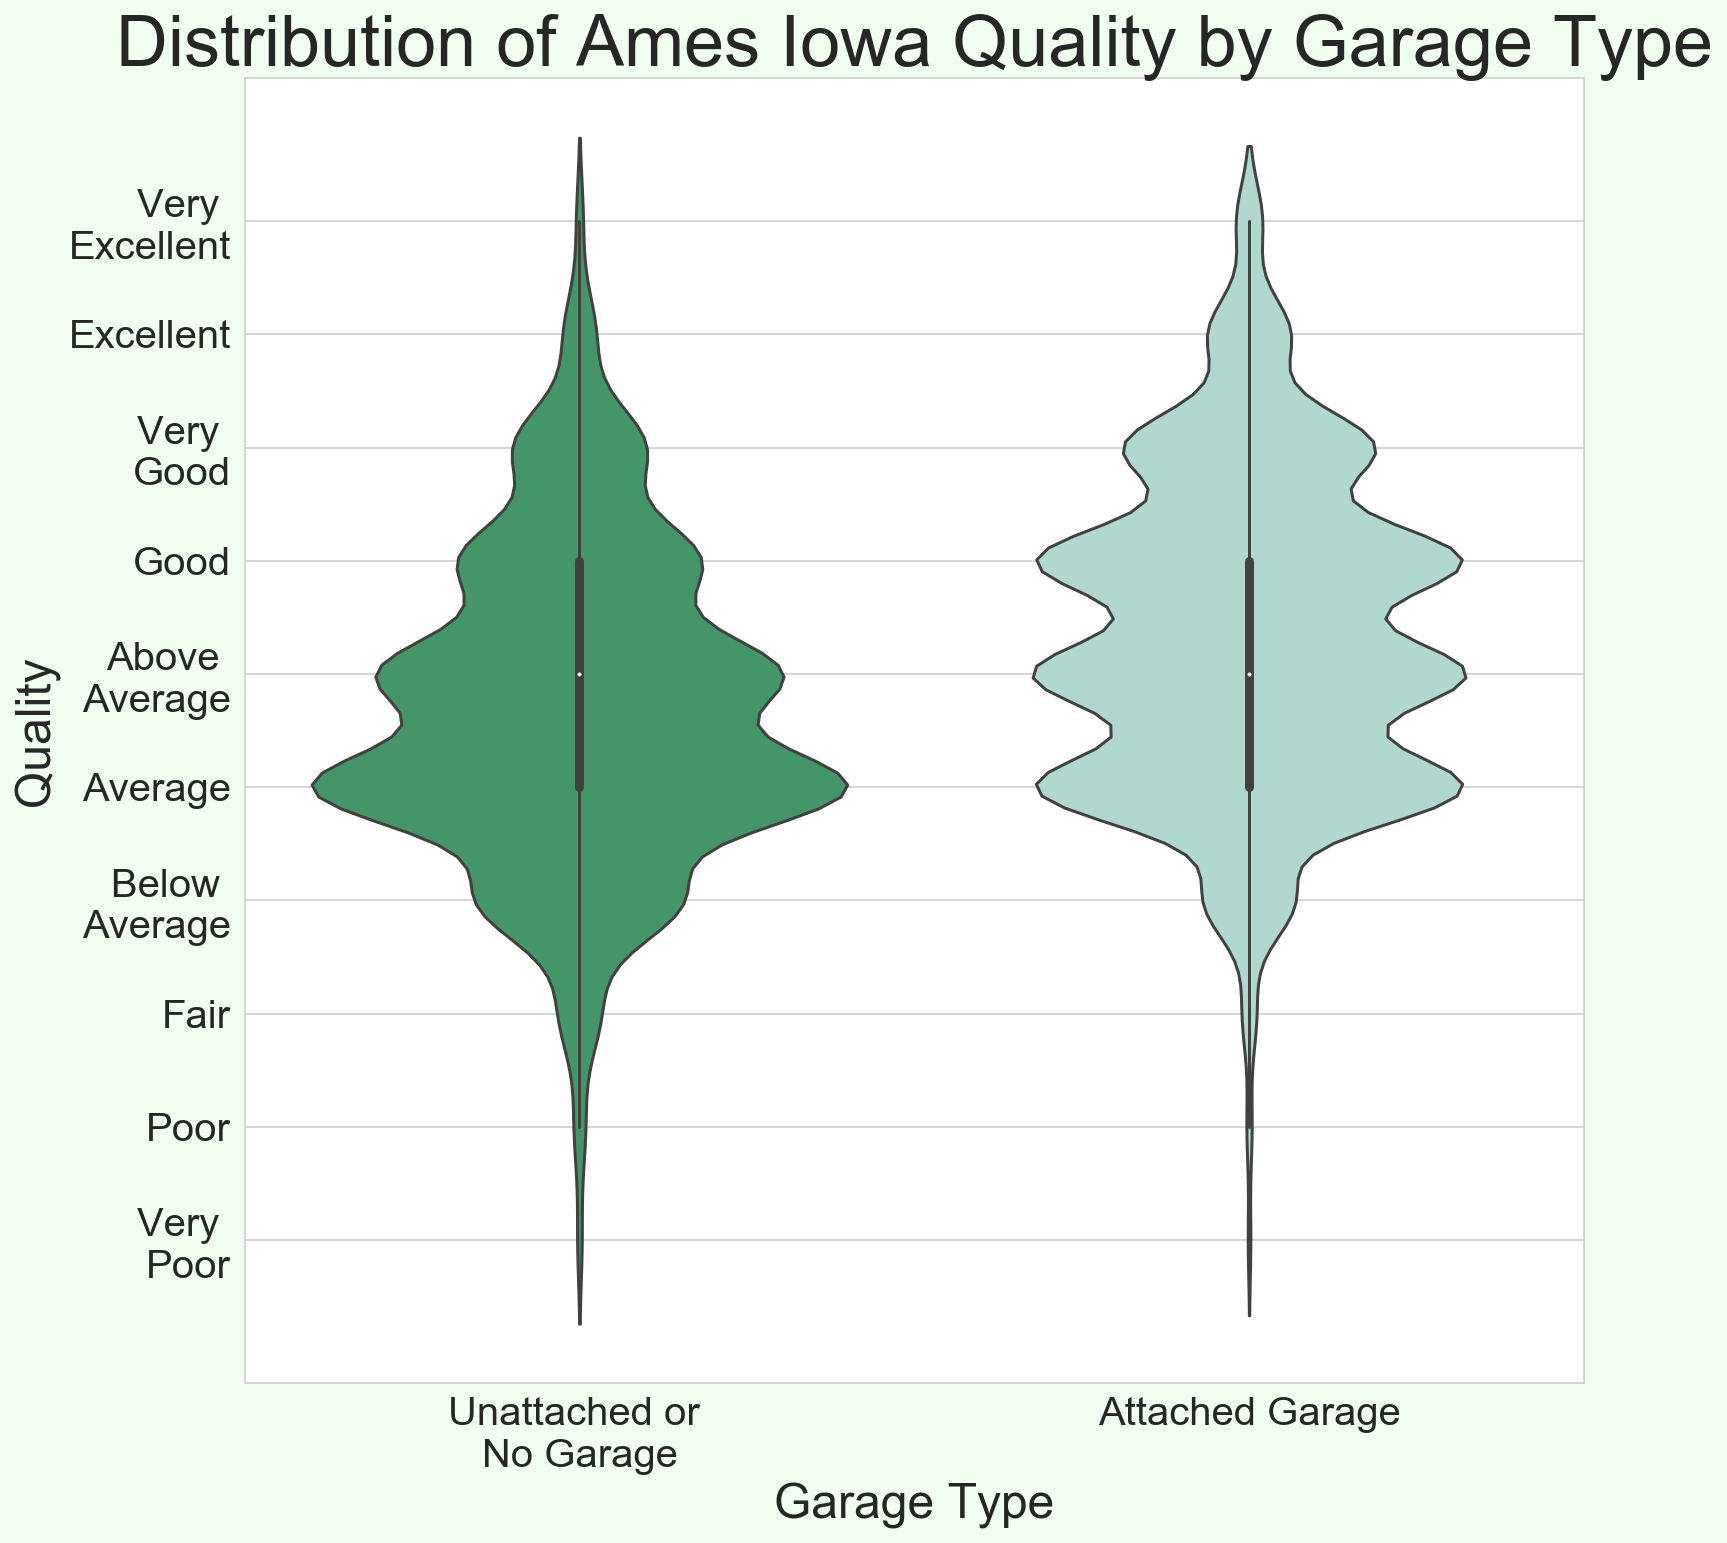

In [184]:
plt.figure(figsize=(12, 12), facecolor='honeydew')
plt.tick_params('both', labelsize=20)
plt.title('Distribution of Ames Iowa Quality by Garage Type', fontsize=36)
sns.violinplot(x=h_df.attached_garage, y=original_df.overall_qual, palette='BuGn_r')
plt.xticks(np.arange(2), ['Unattached or \nNo Garage', 'Attached Garage'])
plt.ylabel('Quality', fontsize=24)
plt.xlabel('Garage Type', fontsize=24)
plt.yticks(np.arange(1,11), ['Very \nPoor', 'Poor', 'Fair', 'Below \nAverage', 'Average', 
                           'Above \nAverage','Good', 'Very \nGood', 'Excellent', 'Very \nExcellent'])